In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 11 19:15:23 2020

@author: juan
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit

import os

import time

import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 

start = time.time() #Saves the begining time of the process

os.makedirs('GraficasProyDNN',exist_ok=True)

#==============================================================================
#LEER DATOS
#==============================================================================
fecha = '2021-08-31'

casos = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

sintomas = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

poblaciones = pd.read_excel('PoblacionMunicipal.xlsx')

#==============================================================================
#ELIMINAR SIN DATO
#==============================================================================

casos = casos[casos.codigo_municipio != 99]

sintomas = sintomas[sintomas.codigo_municipio != 99]

codigoCasos = casos['codigo_municipio']

codigoSintomas = sintomas['codigo_municipio']

codigoPob = poblaciones['codigo_municipio']

faltanCasosMuni = np.array(list(set(casos.municipio).symmetric_difference(poblaciones.municipio)))
faltanCasosDepto = []
for i in range(len(faltanCasosMuni)):
    faltanCasosDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'departamento'].iloc[0])
faltanCasosCodigoMuni = []
for i in range(len(faltanCasosMuni)):
    faltanCasosCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'codigo_municipio'].iloc[0])
faltanCasosPob = []
for i in range(len(faltanCasosMuni)):
    faltanCasosPob.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'poblacion'].iloc[0])
faltanCasosCodigoDepto = []
for i in range(len(faltanCasosMuni)):
    if faltanCasosDepto[i] == 'ALTA VERAPAZ':
        faltanCasosCodigoDepto.append(16)
    elif faltanCasosDepto[i] == 'BAJA VERAPAZ':
        faltanCasosCodigoDepto.append(15)
    elif faltanCasosDepto[i] == 'CHIMALTENANGO':
        faltanCasosCodigoDepto.append(4)
    elif faltanCasosDepto[i] == 'CHIQUIMULA':
        faltanCasosCodigoDepto.append(20)
    elif faltanCasosDepto[i] == 'EL PROGRESO':
        faltanCasosCodigoDepto.append(2)
    elif faltanCasosDepto[i] == 'ESCUINTLA':
        faltanCasosCodigoDepto.append(5)
    elif faltanCasosDepto[i] == 'GUATEMALA':
        faltanCasosCodigoDepto.append(1)
    elif faltanCasosDepto[i] == 'HUEHUETENANGO':
        faltanCasosCodigoDepto.append(13)
    elif faltanCasosDepto[i] == 'IZABAL':
        faltanCasosCodigoDepto.append(18)
    elif faltanCasosDepto[i] == 'JALAPA':
        faltanCasosCodigoDepto.append(21)
    elif faltanCasosDepto[i] == 'JUTIAPA':
        faltanCasosCodigoDepto.append(22)
    elif faltanCasosDepto[i] == 'PETEN':
        faltanCasosCodigoDepto.append(17)
    elif faltanCasosDepto[i] == 'QUETZALTENANGO':
        faltanCasosCodigoDepto.append(9)
    elif faltanCasosDepto[i] == 'QUICHE':
        faltanCasosCodigoDepto.append(14)
    elif faltanCasosDepto[i] == 'RETALHULEU':
        faltanCasosCodigoDepto.append(11)
    elif faltanCasosDepto[i] == 'SACATEPEQUEZ':
        faltanCasosCodigoDepto.append(3)
    elif faltanCasosDepto[i] == 'SAN MARCOS':
        faltanCasosCodigoDepto.append(12)
    elif faltanCasosDepto[i] == 'SANTA ROSA':
        faltanCasosCodigoDepto.append(6)
    elif faltanCasosDepto[i] == 'SOLOLA':
        faltanCasosCodigoDepto.append(7)
    elif faltanCasosDepto[i] == 'SUCHITEPEQUEZ':
        faltanCasosCodigoDepto.append(10)
    elif faltanCasosDepto[i] == 'TOTONICAPAN':
        faltanCasosCodigoDepto.append(8)
    elif faltanCasosDepto[i] == 'ZACAPA':
        faltanCasosCodigoDepto.append(19)

faltanSintomasMuni = np.array(list(set(sintomas.municipio).symmetric_difference(poblaciones.municipio)))
faltanSintomasDepto = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'departamento'].iloc[0])
faltanSintomasCodigoMuni = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'codigo_municipio'].iloc[0])
faltanSintomasPob = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasPob.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'poblacion'].iloc[0])
faltanSintomasCodigoDepto = []
for i in range(len(faltanSintomasMuni)):
    if faltanSintomasDepto[i] == 'ALTA VERAPAZ':
        faltanSintomasCodigoDepto.append(16)
    elif faltanSintomasDepto[i] == 'BAJA VERAPAZ':
        faltanSintomasCodigoDepto.append(15)
    elif faltanSintomasDepto[i] == 'CHIMALTENANGO':
        faltanSintomasCodigoDepto.append(4)
    elif faltanSintomasDepto[i] == 'CHIQUIMULA':
        faltanSintomasCodigoDepto.append(20)
    elif faltanSintomasDepto[i] == 'EL PROGRESO':
        faltanSintomasCodigoDepto.append(2)
    elif faltanSintomasDepto[i] == 'ESCUINTLA':
        faltanSintomasCodigoDepto.append(5)
    elif faltanSintomasDepto[i] == 'GUATEMALA':
        faltanSintomasCodigoDepto.append(1)
    elif faltanSintomasDepto[i] == 'HUEHUETENANGO':
        faltanSintomasCodigoDepto.append(13)
    elif faltanSintomasDepto[i] == 'IZABAL':
        faltanSintomasCodigoDepto.append(18)
    elif faltanSintomasDepto[i] == 'JALAPA':
        faltanSintomasCodigoDepto.append(21)
    elif faltanSintomasDepto[i] == 'JUTIAPA':
        faltanSintomasCodigoDepto.append(22)
    elif faltanSintomasDepto[i] == 'PETEN':
        faltanSintomasCodigoDepto.append(17)
    elif faltanSintomasDepto[i] == 'QUETZALTENANGO':
        faltanSintomasCodigoDepto.append(9)
    elif faltanSintomasDepto[i] == 'QUICHE':
        faltanSintomasCodigoDepto.append(14)
    elif faltanSintomasDepto[i] == 'RETALHULEU':
        faltanSintomasCodigoDepto.append(11)
    elif faltanSintomasDepto[i] == 'SACATEPEQUEZ':
        faltanSintomasCodigoDepto.append(3)
    elif faltanSintomasDepto[i] == 'SAN MARCOS':
        faltanSintomasCodigoDepto.append(12)
    elif faltanSintomasDepto[i] == 'SANTA ROSA':
        faltanSintomasCodigoDepto.append(6)
    elif faltanSintomasDepto[i] == 'SOLOLA':
        faltanSintomasCodigoDepto.append(7)
    elif faltanSintomasDepto[i] == 'SUCHITEPEQUEZ':
        faltanSintomasCodigoDepto.append(10)
    elif faltanSintomasDepto[i] == 'TOTONICAPAN':
        faltanSintomasCodigoDepto.append(8)
    elif faltanSintomasDepto[i] == 'ZACAPA':
        faltanSintomasCodigoDepto.append(19)
#==============================================================================
#AGREGAR DATOS QUE FALTAN
#==============================================================================
#extraer una fila del df de casos
primerafila = casos.iloc[1]
primerafila = primerafila.iloc[5:].values
datosFaltan = np.zeros(len(primerafila))

datosFaltanCasosCols = casos.columns
datosFaltanSintomasCols = sintomas.columns

datosFaltanCasos = np.zeros((len(faltanCasosDepto),len(datosFaltanCasosCols))).astype(object)
for i in range(len(faltanCasosDepto)):
    for j in range(len(datosFaltanCasosCols)):
        if j ==0:
            datosFaltanCasos[i][j] = faltanCasosDepto[i]
        elif j==1:
            datosFaltanCasos[i][j] = faltanCasosCodigoDepto[i]
        elif j==2:
            datosFaltanCasos[i][j] = faltanCasosMuni[i]
        elif j==3:
            datosFaltanCasos[i][j] = faltanCasosCodigoMuni[i]
        elif j==4:
            datosFaltanCasos[i][j] = faltanCasosPob[i]
            
datosFaltanSintomas = np.zeros((len(faltanSintomasDepto),len(datosFaltanSintomasCols))).astype(object)
for i in range(len(faltanSintomasDepto)):
    for j in range(len(datosFaltanSintomasCols)):
        if j ==0:
            datosFaltanSintomas[i][j] = faltanSintomasDepto[i]
        elif j==1:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoDepto[i]
        elif j==2:
            datosFaltanSintomas[i][j] = faltanSintomasMuni[i]
        elif j==3:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoMuni[i]
        elif j==4:
            datosFaltanSintomas[i][j] = faltanSintomasPob[i]
            
FaltanCasos = pd.DataFrame(datosFaltanCasos,columns=casos.columns)
FaltanSintomas = pd.DataFrame(datosFaltanSintomas,columns=sintomas.columns)

print('En casos positivos no hay datos de ' + str(FaltanCasos['municipio'].values))
print('En sintomas no hay datos de ' + str(FaltanSintomas['municipio'].values))

casos = casos.append(FaltanCasos)
sintomas = sintomas.append(FaltanSintomas)

#==============================================================================
#EXTRAER DATOS POR DEPARTAMENTO
#==============================================================================

departamentos = casos['departamento'].unique()
municipios = casos['municipio'].unique()

casosDepto = {}

for depto in departamentos:
    casosDepto[depto] = pd.DataFrame(casos.loc[casos['departamento'] == depto])
    casosDepto[depto].drop(['departamento','codigo_departamento','codigo_municipio','poblacion'], axis = 1, inplace = True)
    casosDepto[depto] = casosDepto[depto].set_index('municipio')
    
sintomasDepto = {}

for depto in departamentos:
    sintomasDepto[depto] = pd.DataFrame(sintomas.loc[sintomas['departamento'] == depto])
    sintomasDepto[depto].drop(['departamento','codigo_departamento','codigo_municipio','poblacion'], axis = 1, inplace = True)
    sintomasDepto[depto] = sintomasDepto[depto].set_index('municipio')
    
pobDepto = {}

for depto in departamentos:
    pobDepto[depto] = pd.DataFrame(poblaciones.loc[poblaciones['departamento'] == depto])
    pobDepto[depto].drop(['codigo_municipio','departamento'], axis = 1, inplace = True)
    pobDepto[depto] = pobDepto[depto].set_index('municipio')
    
#==============================================================================
#DATOS POR DEPARTAMENTO UTILES
#==============================================================================
fechas = casosDepto['GUATEMALA'].columns.values
fechas1 = fechas[7::14]
fechas2 = fechas1[1:len(fechas1)]
diasMediaMovil = 14

NOMBREDEPTO = []
Poblacion =[]
POSITIVOSDEPTO = []
SINTOMASDEPTO = []

for depto in departamentos:
    pob = 0
    cantidadMunicipios = len(casosDepto[depto].index)
    positivosDepto = np.zeros(len(fechas))
    sintomasTotalesDepto = np.zeros(len(fechas))
    mediamovilDepto = np.zeros(len(fechas)-diasMediaMovil)
    
    for muni in casosDepto[depto].index:
        
        positivos = casosDepto[depto].loc[muni].values.astype(float)
        sintomasTotales = sintomasDepto[depto].loc[muni].values.astype(float)
        
        positivosDepto = positivos + positivosDepto
        
        sintomasTotalesDepto = sintomasTotalesDepto + sintomasTotales
        
        pob += pobDepto[depto].loc[muni].values[0]
        
    for i in range(len(positivosDepto)-diasMediaMovil):
        mediamovilDepto[i] = np.mean(positivosDepto[i:i+diasMediaMovil])
    
    NOMBREDEPTO.append(depto)
    Poblacion.append(pob)
    POSITIVOSDEPTO.append(mediamovilDepto)#POSITIVOSDEPTO.append(positivosDepto)
    SINTOMASDEPTO.append(sintomasTotalesDepto)
    
acumuladosReportados = np.zeros((len(NOMBREDEPTO),len(POSITIVOSDEPTO[0])))
acumuladosSintomas = np.zeros((len(NOMBREDEPTO),len(POSITIVOSDEPTO[0])))

for j in range(len(NOMBREDEPTO)):
    for i in range(len(POSITIVOSDEPTO[0])-1):
        if i ==0:
            acumuladosReportados[j][i] = POSITIVOSDEPTO[j][i]
            acumuladosSintomas[j][i] = SINTOMASDEPTO[j][i]
            
        else:
            acumuladosReportados[j][i] = acumuladosReportados[j][i-1] + POSITIVOSDEPTO[j][i]
            acumuladosSintomas[j][i] = acumuladosSintomas[j][i-1] + SINTOMASDEPTO[j][i]
            



En casos positivos no hay datos de []
En sintomas no hay datos de []


/tmp/ipykernel_13721/3952423583.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  casos = casos.append(FaltanCasos)
/tmp/ipykernel_13721/3952423583.py:216: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sintomas = sintomas.append(FaltanSintomas)


In [2]:
#==============================================================================
#ESTIMACIONES DE BETA
#==============================================================================
gamma = 1./21.

A = acumuladosReportados
dA = POSITIVOSDEPTO
R = np.zeros((len(A),len(A[0])))
I = A - R
S = np.zeros((len(A),len(A[0])))
Beta = np.zeros((len(A),len(A[0])))
Rt = np.zeros((len(A),len(A[0])))
R0 = np.zeros((len(A),len(A[0])))

inicio = 100

for i in range(len(A)):
    for j in range(len(A[0])):
        S[i][j] = Poblacion[i] - A[i][j]
        
for i in range(len(A)):
    N = Poblacion[i]
    for j in range(len(A[0])):
        if j>21:
            R[i][j] = dA[i][j-20] + R[i][j-1]
        else:
            R[i][j] = 0
            
        if A[i][j] - R[i][j] <= 0:
            I[i][j] = I[i][j-1]
        else:
            I[i][j] = A[i][j] - R[i][j]
        S[i][j] = N - I[i][j] - R[i][j]
        if j>1:
            Beta[i][j] = dA[i][j]/(S[i][j-1]*I[i][j-1])*N
        Rt[i][j] = Beta[i][j]/gamma * S[i][j]/N
        R0[i][j] = Beta[i][j]/gamma
        
        if A[i][j] <= 0:
            A[i][j] = A[i][j-1]
        


In [3]:
#-----------------------------------------------------------------------------
    #RED NEURONAL
#-----------------------------------------------------------------------------



def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,0]) #es la data de retraso? utiliza datos anteriores como variables que influyen 
        #en las nuevas.
        Y.append(data_arr[d,0])
    return np.array(X), np.array(Y)
    
#train_size = int(0.7*len(Rt[n][inicio:]))
#train, test =df1.values[0:train_size,:],df1.values[train_size:len(df1.values),:]

look_back = 30

#trainX, trainY = convert2matrix(train, look_back)
#testX, testY = convert2matrix(test, look_back)

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import seaborn as sns

def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=64, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

#model = model_dnn(look_back)

#history = model.fit(trainX,trainY,epochs=100,batch_size=30,verbose=1,validation_data=(testX,testY),shuffle=False)

def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss - '+NOMBREDEPTO[n])
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.savefig('GraficasProyDNN/'+NOMBREDEPTO[n]+'Loss.png', bbox_inches = 'tight')
    plt.show();

def DifFinitas2(I0,S0,R0,BetaCoef,n,Poblacion,dA0,A0):
    Infectados = [I0]
    Sucept = [S0] ##########OJO EL PRIMER RESULTADO DE LA SOLUCION ES IGUAL AL VALOR INICIAL, LO MODIFICAREMOS
    Removidos = [R0]
    RepDiario = [dA0]
    ACUMULADO = [A0]
    gamma = 1./21
    TamanioPrueba = 38 #el tamanio final es TamanioPrueba + 1
    for j in range(TamanioPrueba):
#        dA1 = BetaCoef[j][0]*I0*S0/Poblacion[n] - gamma*I0 #por persona
        #no tengo que restarle los recuperados a los acumulados, debo restarlo en los infectados actuales
    #    dA1 = BetaCoef[j][0]*I0*S0 - gamma*I0
        dA1 = BetaCoef[j]*I0*S0/Poblacion[n]
        I1 = I0 + dA1  - gamma*I0
        S1 = S0 - BetaCoef[j]*I0*S0/Poblacion[n]
        R1 = R0 + gamma*I0
        A1 = A0 + dA1
        Infectados.append(I1)
        Sucept.append(S1)
        Removidos.append(R1)
        RepDiario.append(dA1)
        ACUMULADO.append(A1)
        I0, S0, R0, A0 = I1, S1, R1, A1
    return Infectados, Sucept, Removidos, ACUMULADO, RepDiario




2023-04-11 22:14:52.304778: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-11 22:14:52.304868: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


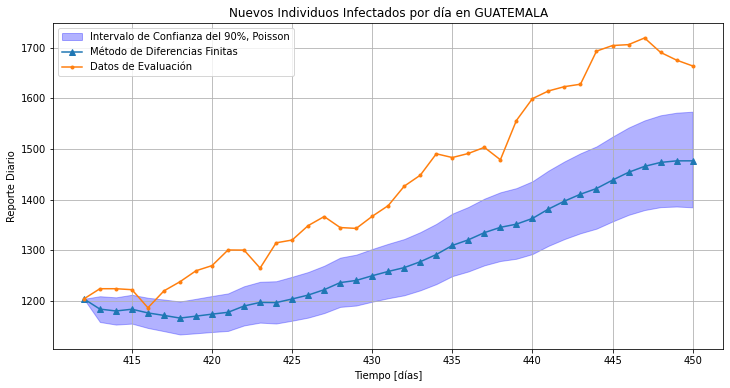

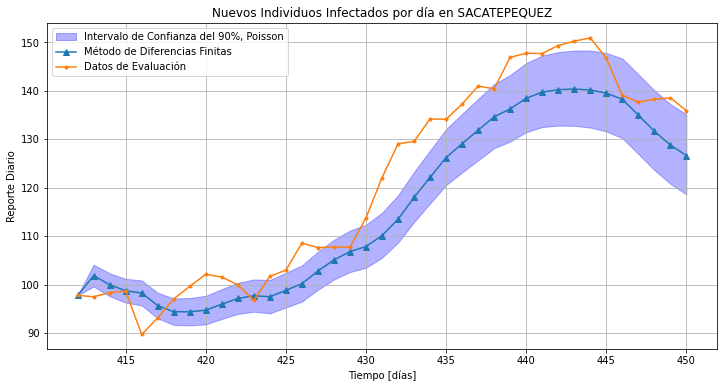

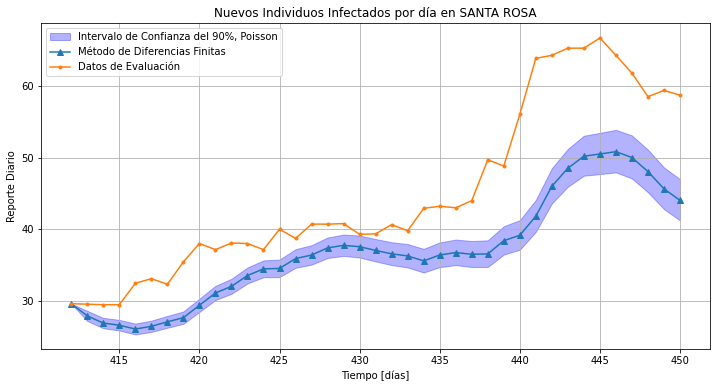

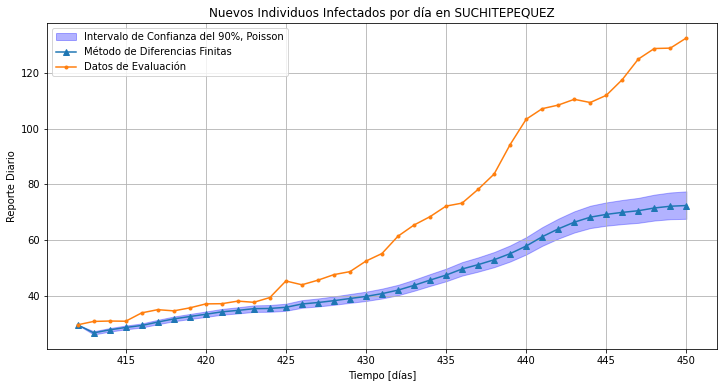

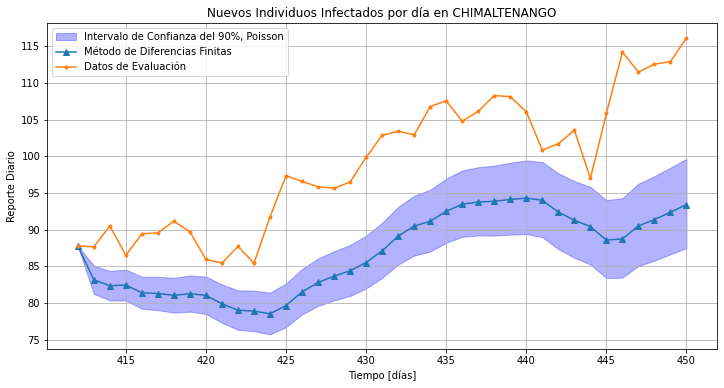

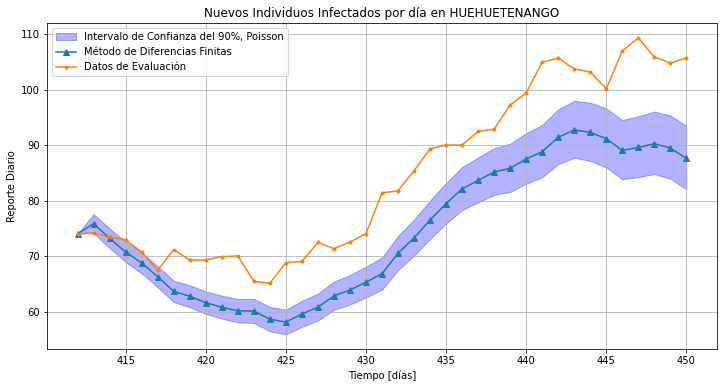

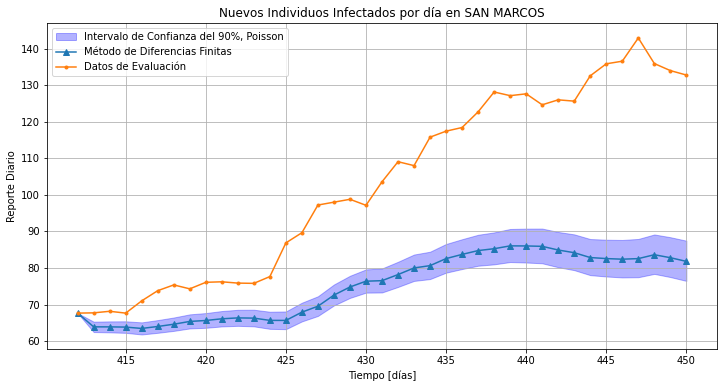

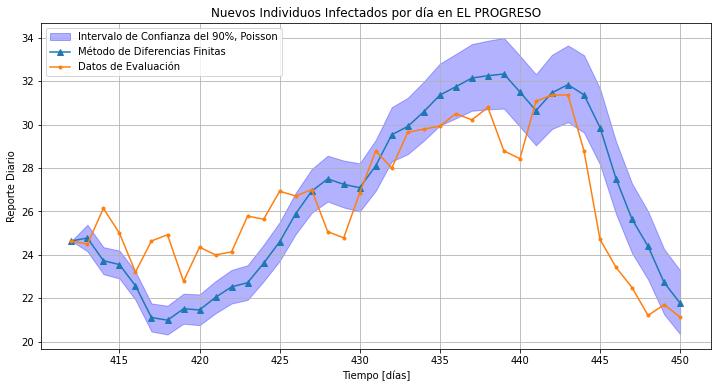

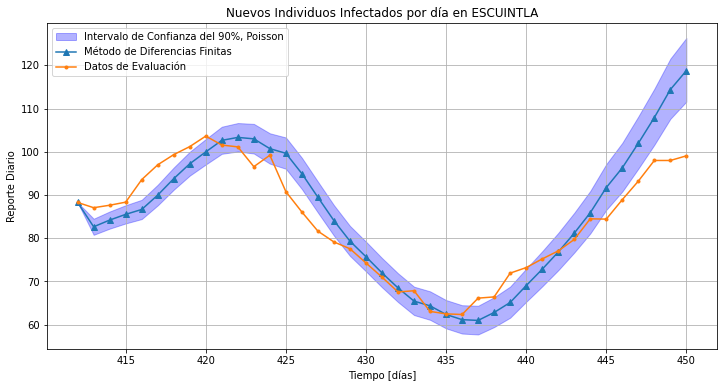

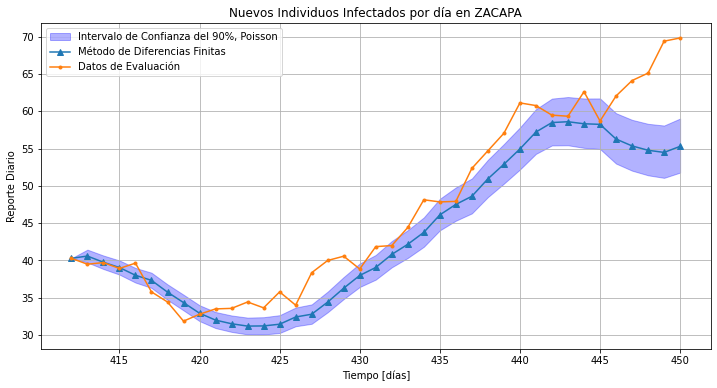

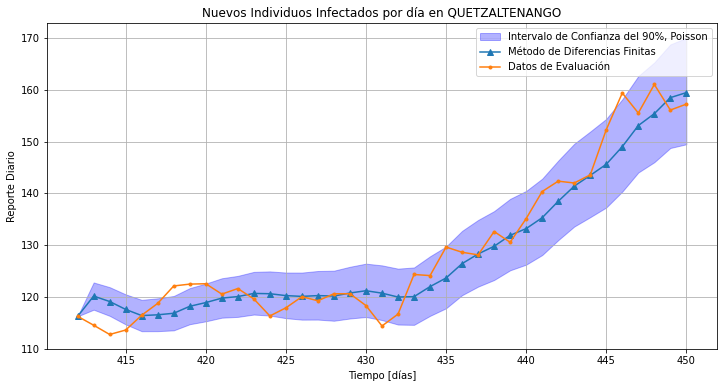

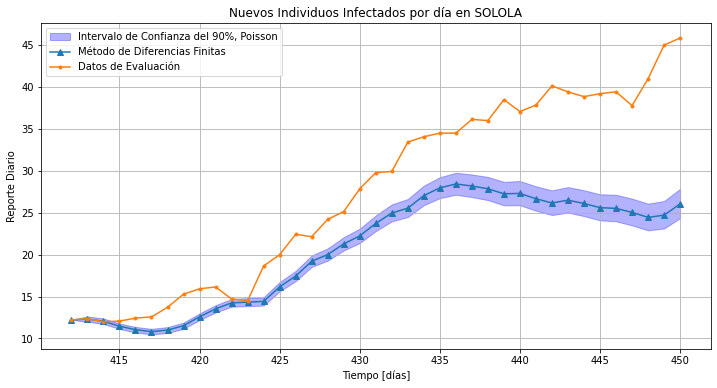

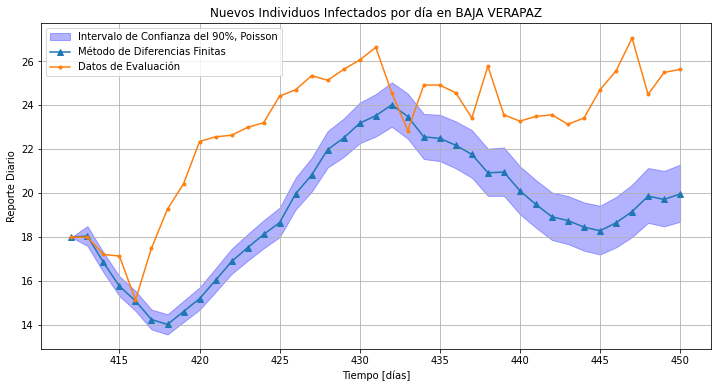

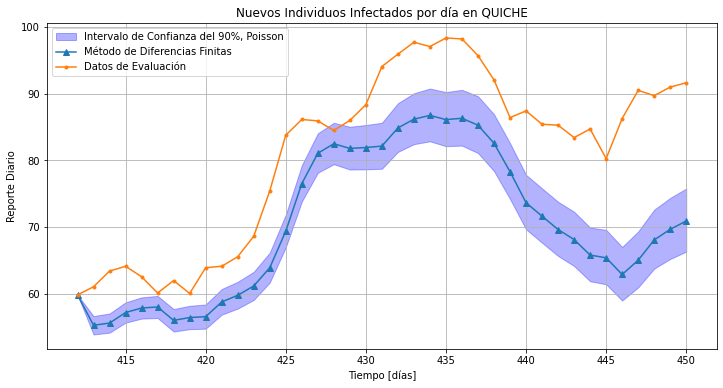

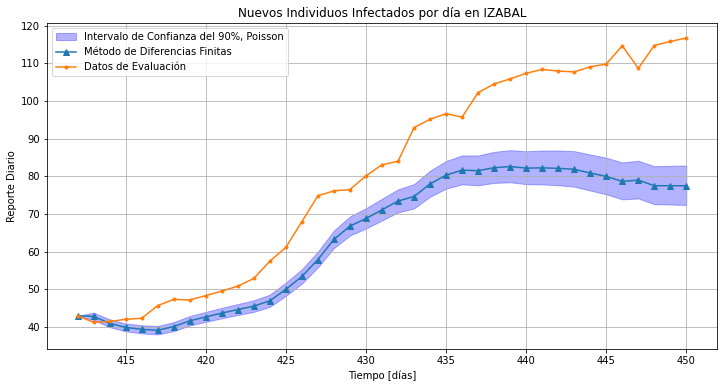

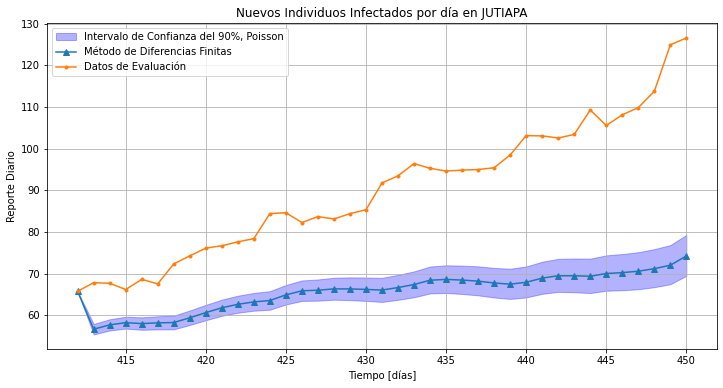

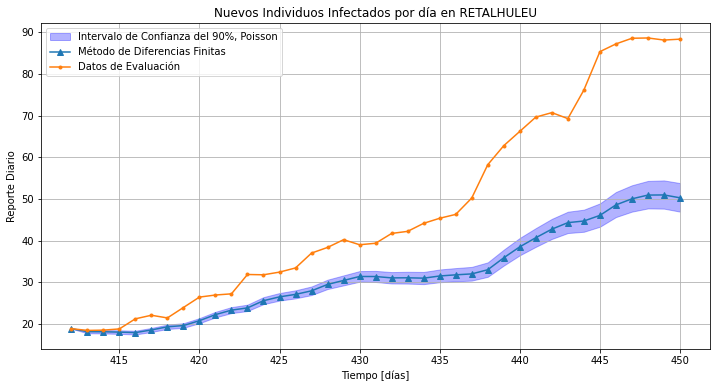

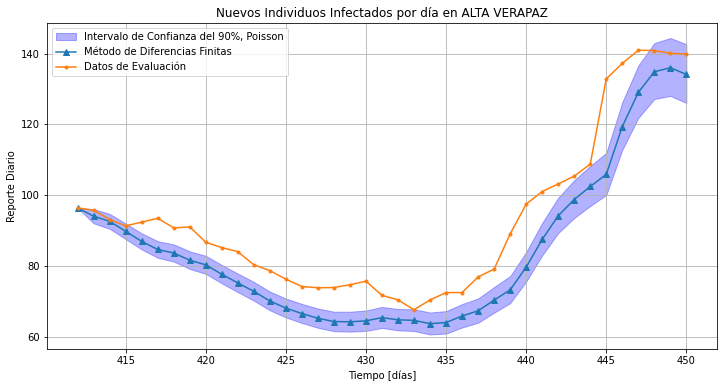

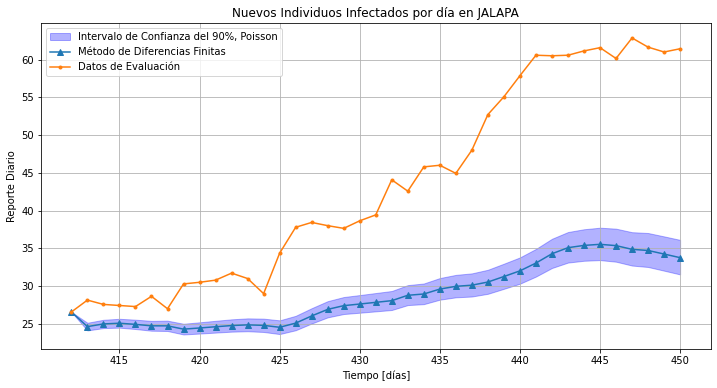

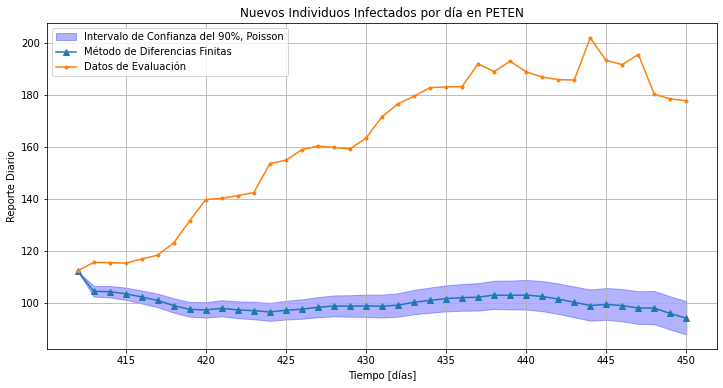

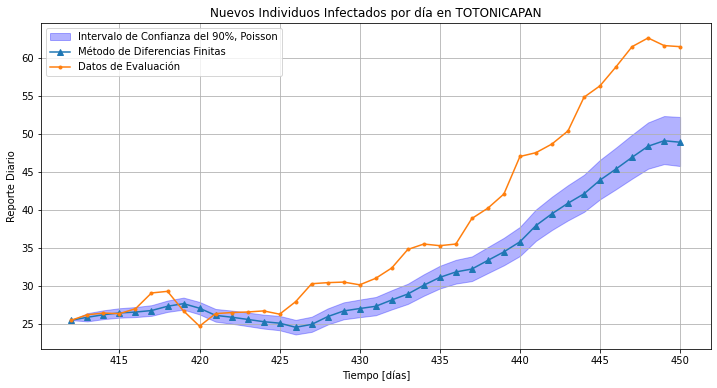

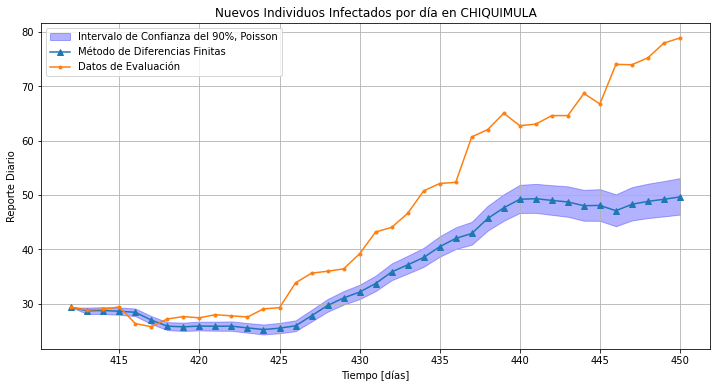

In [4]:
L = len(A[0])-1
for n in range(22):
#for n in range(len(departamentos)):
    df1 = pd.DataFrame({'Fecha':fechas[inicio:L],'Beta':Beta[n][inicio:L], 'I':I[n][inicio:L], 'S':S[n][inicio:L], 'R':R[n][inicio:L], 'A':A[n][inicio:L], 'dA':dA[n][inicio:L]})
    df1 = df1.set_index('Fecha')
    
    train_size = int(len(Rt[n][inicio:])-70)
    ######################################################################################
    ######################################################################################
    ######################################################################################   
    #Data frame de entrenamiento y prueba
    trainI, testI = df1.values[0:train_size,1:2],df1.values[train_size:len(df1.values),1:2]
    trainXI, trainYI = convert2matrix(trainI, look_back)
    testXI, testYI = convert2matrix(testI, look_back)
  
    #prediction_plot(testYI,test_predictI)
    ######################################################################################
    ######################################################################################
    ######################################################################################    
    
    trainS, testS = df1.values[0:train_size,2:3],df1.values[train_size:len(df1.values),2:3]############3333

    trainXS, trainYS= convert2matrix(trainS, look_back)
    testXS, testYS = convert2matrix(testS, look_back)
    
   
    #prediction_plot(testYS,test_predictS)
    ######################################################################################
    ######################################################################################
    ######################################################################################    

    trainR, testR = df1.values[0:train_size,3:4],df1.values[train_size:len(df1.values),3:4]############

    trainXR, trainYR= convert2matrix(trainR, look_back)
    testXR, testYR = convert2matrix(testR, look_back)

    ######################################################
    trainA, testA = df1.values[0:train_size,4:5],df1.values[train_size:len(df1.values),4:5]############

    trainXA, trainYA= convert2matrix(trainA, look_back)
    testXA, testYA = convert2matrix(testA, look_back)
    
    
    ######################################################
    traindA, testdA = df1.values[0:train_size,5:6],df1.values[train_size:len(df1.values),5:6]############

    trainXdA, trainYdA= convert2matrix(traindA, look_back)
    testXdA, testYdA = convert2matrix(testdA, look_back)
    
    #prediction_plot(testYR,test_predictR)
    ######################################################################################
    ######################################################################################
    ######################################################################################    
    I0 = testYI[0]
    S0 = testYS[0]
    R0 = testYR[0]
    A0 = testYA[0]
    dA0 = testYdA[0]
    Bpred = pd.read_csv(NOMBREDEPTO[n] + 'BetaCon90%Poisson.csv')
    Bpred = Bpred.to_numpy()/1000
    #en el siguiente bloque tenia originalmente los coef 0,1 y 2 en Bpred.transpose()[0], los modifico 24/01
    Infected,Sucept,Remov, ACUMULADO, RepDiario = DifFinitas2(I0,S0,R0, Bpred.transpose()[0],n, Poblacion, dA0, A0) #predicciones
    DeltaI1, DeltaS1, DeltaR1, DeltaA1, DeltaRep1 = DifFinitas2(I0,S0,R0, Bpred.transpose()[2],n, Poblacion, dA0, A0)
    DeltaI2, DeltaS2, DeltaR2, DeltaA2, DeltaRep2 = DifFinitas2(I0,S0,R0, Bpred.transpose()[3],n, Poblacion, dA0, A0)
    #############################
    #############################
    date1 = []
    for j in range(look_back, look_back + len(trainYI)):
        date1.append(j)
    date2 = []
    for j in range(len(trainYI) + look_back+ look_back, len(I[n][inicio:L])):
        date2.append(j)
    plt.figure(figsize=(12,6))
    ##########################################################
    ####plt.plot(date2, DeltaRep1,  '.-', color = 'g')
    ####plt.plot(date2, DeltaRep2,  '.-', label=' Uncertainty ', color = 'g')
    
    plt.fill_between(date2, DeltaRep1, DeltaRep2,color = 'b',
                    alpha = 0.3,  label= 'Intervalo de Confianza del 90%, Poisson' )
    #Cual es el intervalo de confianza asociado a esta incertidumbre
    ##########################################################
    #plt.plot(dA[n][inicio:],label='Reporte diario Real')
    plt.plot(date2, RepDiario,  '^-', label='Método de Diferencias Finitas')
    #plt.plot(date1, trainYdA, label='Reporte Diario Train')
    plt.plot(date2, testYdA, '.-', label='Datos de Evaluación')    #Susceptibles?
    plt.legend()
    plt.xlabel("Tiempo [días]")
    plt.ylabel("Reporte Diario")
    plt.grid()
    plt.title('Nuevos Individuos Infectados por día en ' + NOMBREDEPTO[n])
    plt.savefig('SIR/'+NOMBREDEPTO[n]+'ReporteDiarioPoisson90' + '.pdf', bbox_inches = 'tight')


In [5]:
pd.read_csv(NOMBREDEPTO[n] + 'BetaCon90%Poisson.csv')

Beta  Desviacion 90%  Limite Inferior  Limite Superior
0   64.571915        1.321867        63.250048        65.893782
1   63.646202        1.312357        62.333845        64.958560
2   62.425277        1.299709        61.125568        63.724986
3   61.122687        1.286077        59.836610        62.408765
4   57.319135        1.245420        56.073715        58.564554
5   54.468128        1.214052        53.254076        55.682179
6   53.874784        1.207421        52.667363        55.082205
7   53.877184        1.207448        52.669736        55.084632
8   53.505525        1.203276        52.302250        54.708801
9   53.278479        1.200720        52.077759        54.479200
10  52.350878        1.190222        51.160656        53.541100
11  51.525142        1.180798        50.344344        52.705940
12  51.880151        1.184859        50.695292        53.065010
13  52.562635        1.192627        51.370008        53.755261
14  56.090179        1.231996        54.858183        57.322175
15  59.442677        1.268280        58.174398        60.710957
16  61.538145        1.290441        60.247704        62.828586
17  62.870548        1.304336        61.566212        64.174884
18  65.014182        1.326386        63.687796        66.340569
19  67.984092        1.356343        66.627749        69.340435
20  69.129473        1.367721        67.761752        70.497194
21  70.214893        1.378417        68.836476        71.593310
22  72.275191        1.398494        70.876697        73.673685
23  73.267248        1.408059        71.859189        74.675307
24  73.056202        1.406030        71.650172        74.462231
25  75.904036        1.433172        74.470864        77.337208
26  77.082017        1.444250        75.637767        78.526267
27  77.433115        1.447536        75.985579        78.880650
28  75.430617        1.428696        74.001921        76.859313
29  73.011513        1.405599        71.605913        74.417112
30  70.869553        1.384828        69.484725        72.254381
31  68.350951        1.359998        66.990954        69.710949
32  67.110373        1.347599        65.762774        68.457972
33  64.557319        1.321718        63.235601        65.879036
34  65.153579        1.327807        63.825771        66.481386
35  64.802633        1.324226        63.478407        66.126859
36  64.286018        1.318937        62.967081        65.604956
37  63.852691        1.314485        62.538206        65.167176
38  62.928392        1.304936        61.623456        64.233328

In [6]:
 Bpred.transpose()[1]

array([0.00132187, 0.00131236, 0.00129971, 0.00128608, 0.00124542,
       0.00121405, 0.00120742, 0.00120745, 0.00120328, 0.00120072,
       0.00119022, 0.0011808 , 0.00118486, 0.00119263, 0.001232  ,
       0.00126828, 0.00129044, 0.00130434, 0.00132639, 0.00135634,
       0.00136772, 0.00137842, 0.00139849, 0.00140806, 0.00140603,
       0.00143317, 0.00144425, 0.00144754, 0.0014287 , 0.0014056 ,
       0.00138483, 0.00136   , 0.0013476 , 0.00132172, 0.00132781,
       0.00132423, 0.00131894, 0.00131448, 0.00130494])

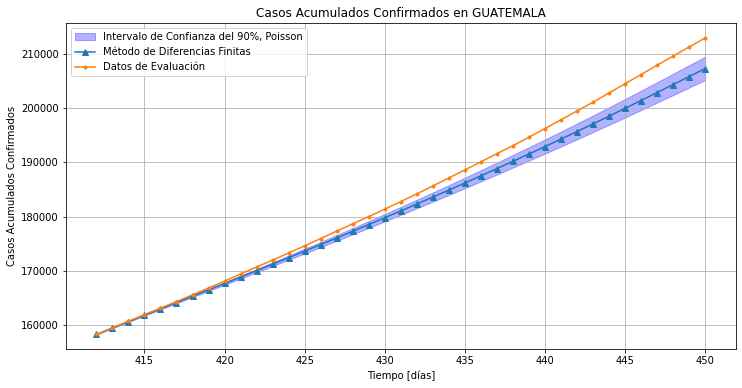

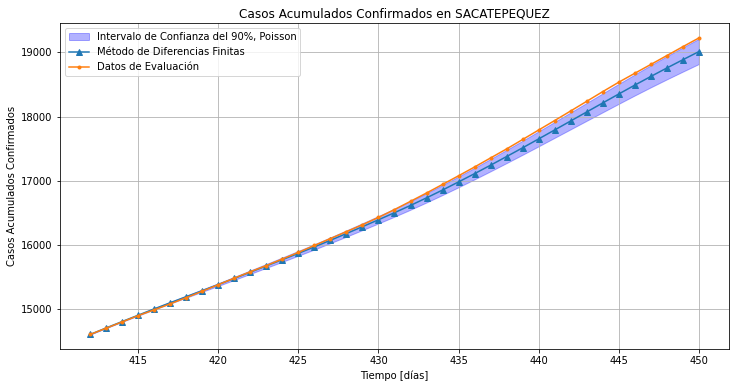

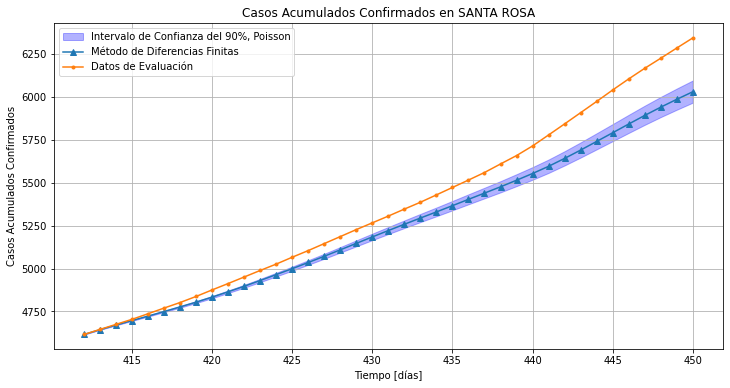

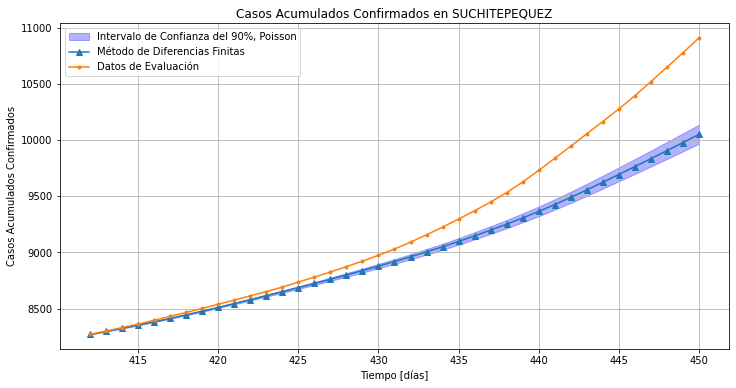

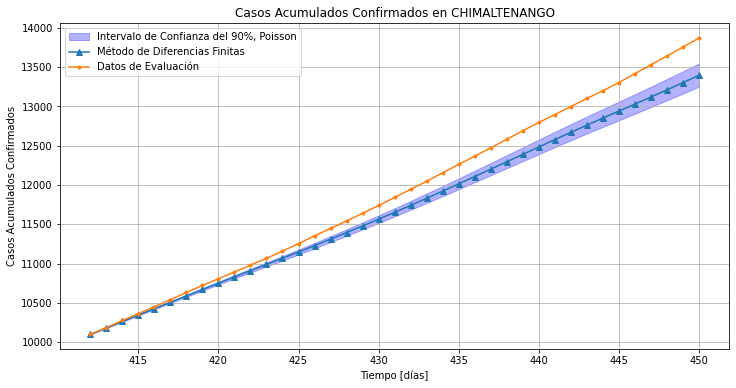

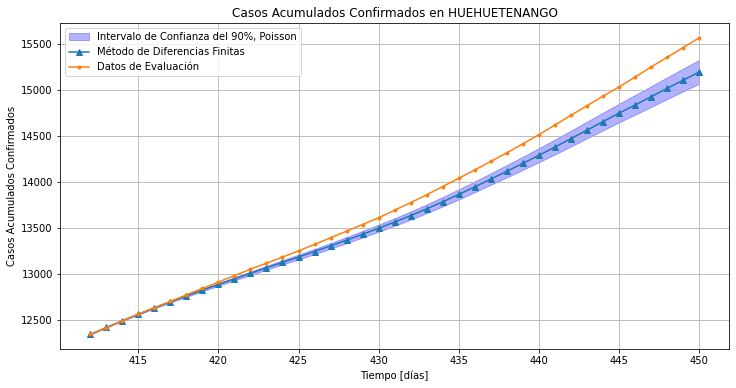

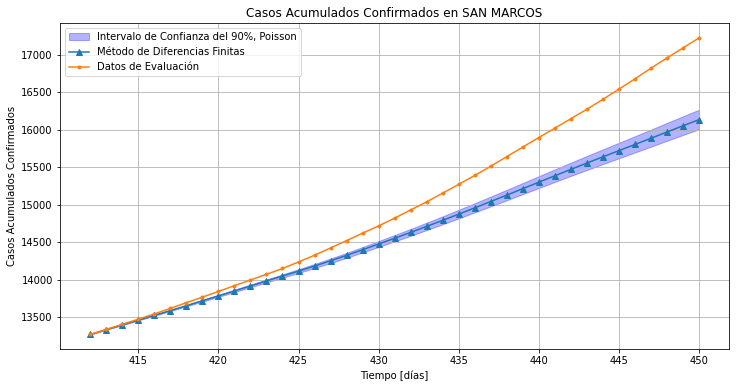

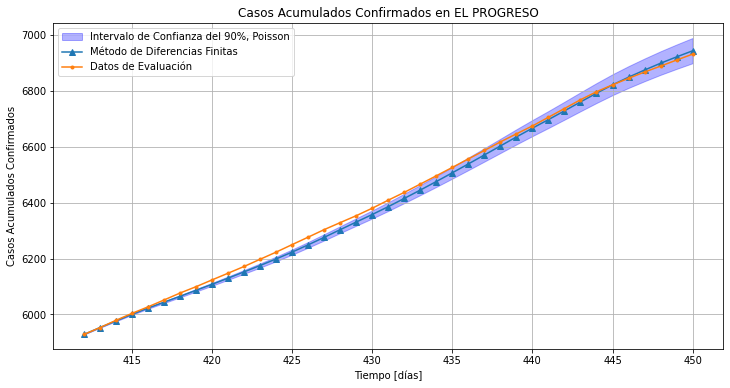

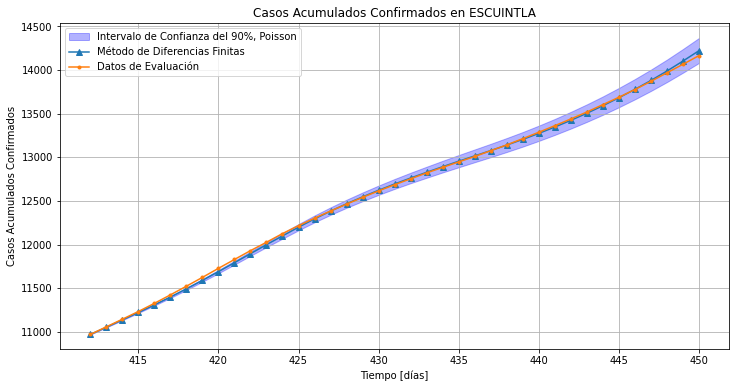

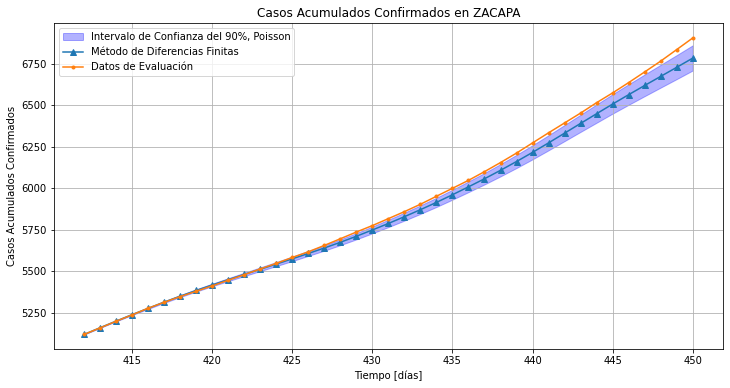

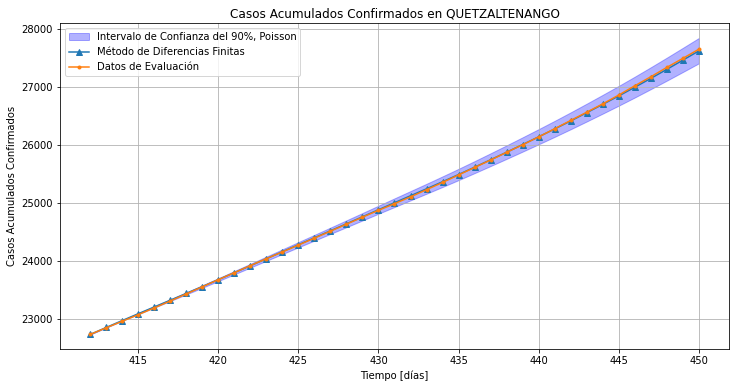

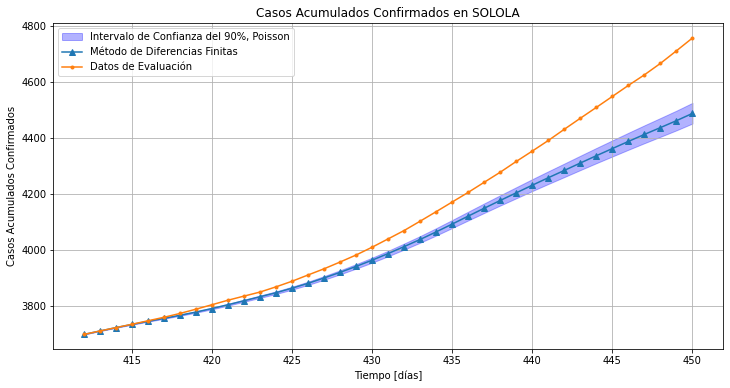

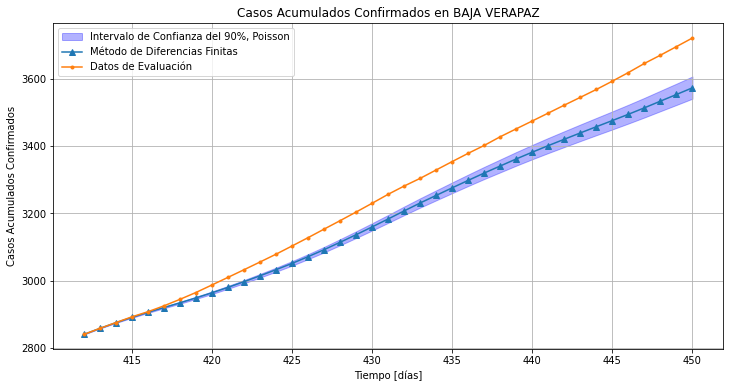

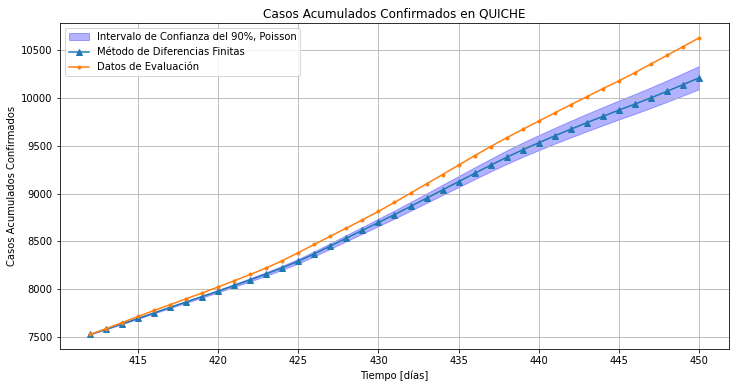

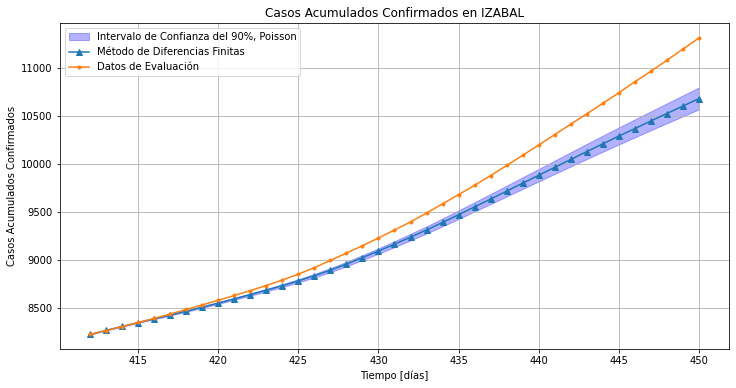

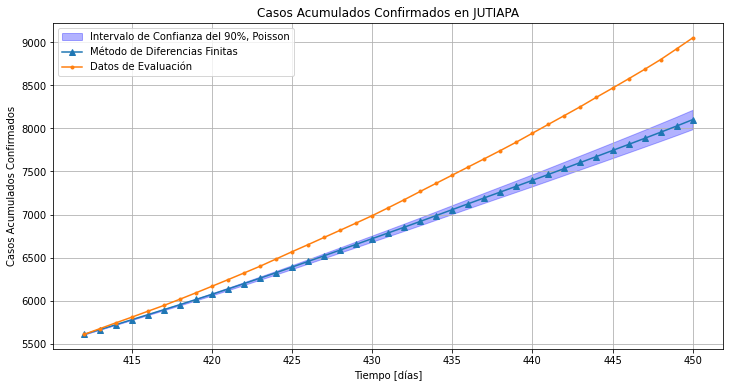

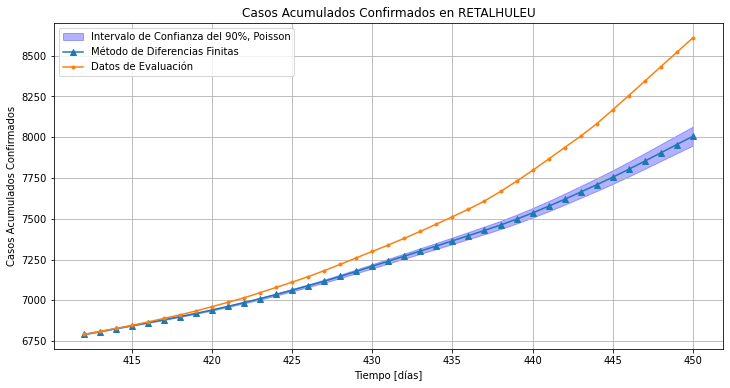

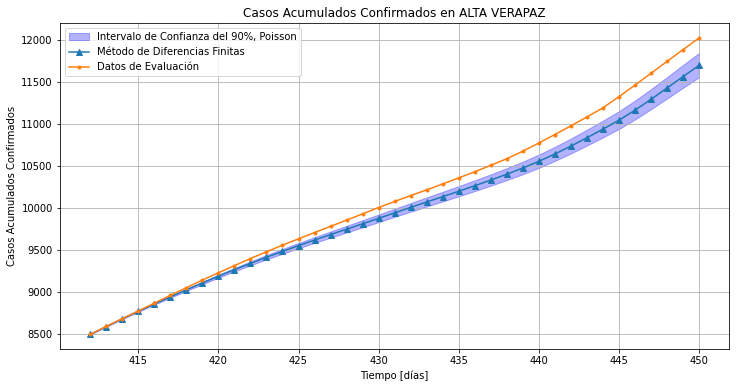

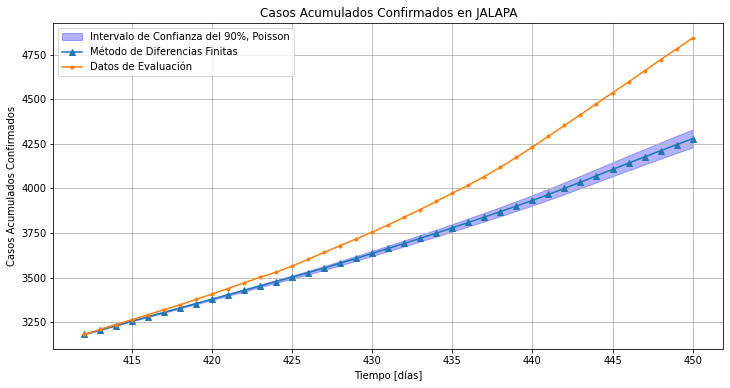

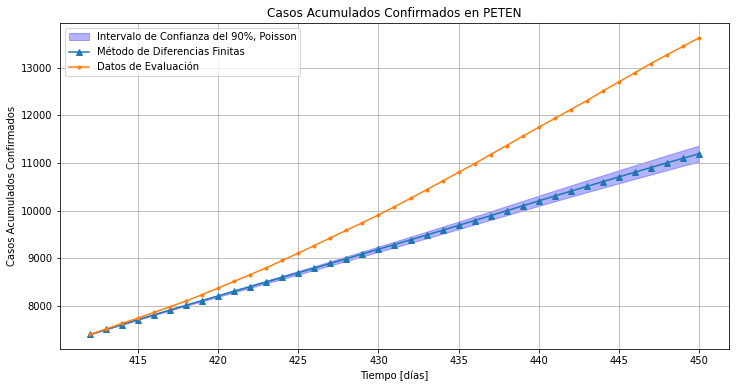

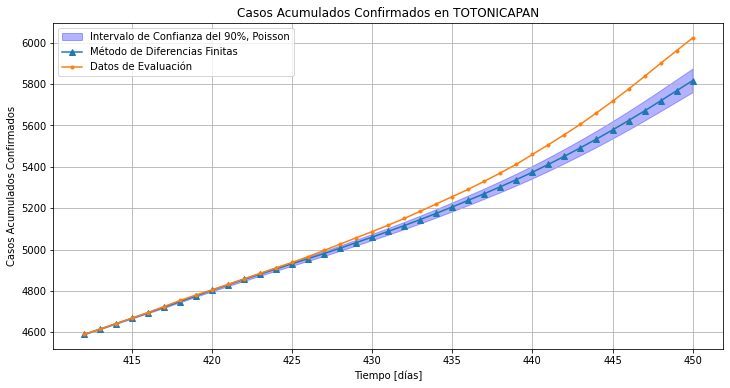

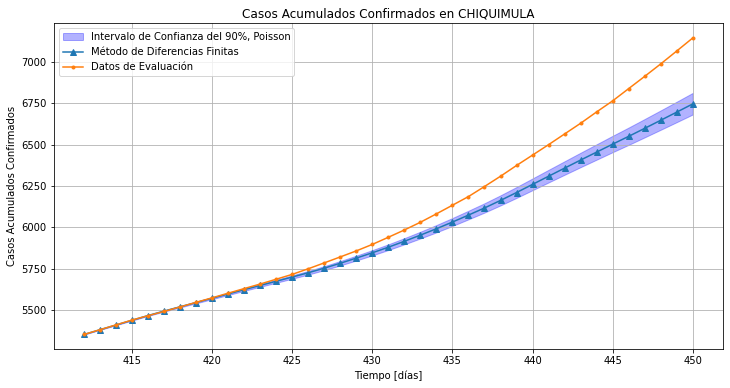

In [7]:
L = len(A[0])-1
for n in range(22):
#for n in range(len(departamentos)):
    df1 = pd.DataFrame({'Fecha':fechas[inicio:L],'Beta':Beta[n][inicio:L], 'I':I[n][inicio:L], 'S':S[n][inicio:L], 'R':R[n][inicio:L], 'A':A[n][inicio:L], 'dA':dA[n][inicio:L]})
    df1 = df1.set_index('Fecha')
    
    train_size = int(len(Rt[n][inicio:])-70)
    ######################################################################################
    ######################################################################################
    ######################################################################################   
    #Data frame de entrenamiento y prueba
    trainI, testI = df1.values[0:train_size,1:2],df1.values[train_size:len(df1.values),1:2]
    trainXI, trainYI = convert2matrix(trainI, look_back)
    testXI, testYI = convert2matrix(testI, look_back)
  
    #prediction_plot(testYI,test_predictI)
    ######################################################################################
    ######################################################################################
    ######################################################################################    
    
    trainS, testS = df1.values[0:train_size,2:3],df1.values[train_size:len(df1.values),2:3]############3333

    trainXS, trainYS= convert2matrix(trainS, look_back)
    testXS, testYS = convert2matrix(testS, look_back)
    
   
    #prediction_plot(testYS,test_predictS)
    ######################################################################################
    ######################################################################################
    ######################################################################################    

    trainR, testR = df1.values[0:train_size,3:4],df1.values[train_size:len(df1.values),3:4]############

    trainXR, trainYR= convert2matrix(trainR, look_back)
    testXR, testYR = convert2matrix(testR, look_back)

    ######################################################
    trainA, testA = df1.values[0:train_size,4:5],df1.values[train_size:len(df1.values),4:5]############

    trainXA, trainYA= convert2matrix(trainA, look_back)
    testXA, testYA = convert2matrix(testA, look_back)
    
    
    ######################################################
    traindA, testdA = df1.values[0:train_size,5:6],df1.values[train_size:len(df1.values),5:6]############

    trainXdA, trainYdA= convert2matrix(traindA, look_back)
    testXdA, testYdA = convert2matrix(testdA, look_back)
    
    #prediction_plot(testYR,test_predictR)
    ######################################################################################
    ######################################################################################
    ######################################################################################    
    I0 = testYI[0]
    S0 = testYS[0]
    R0 = testYR[0]
    A0 = testYA[0]
    dA0 = testYdA[0]
    Bpred = pd.read_csv(NOMBREDEPTO[n] + 'BetaCon90%Poisson.csv')
    Bpred = Bpred.to_numpy()/1000
    #en el siguiente bloque tenia originalmente los coef 0,1 y 2 en Bpred.transpose()[0], los modifico 24/01
    Infected,Sucept,Remov, ACUMULADO, RepDiario = DifFinitas2(I0,S0,R0, Bpred.transpose()[0],n, Poblacion, dA0, A0) #predicciones
    DeltaI1, DeltaS1, DeltaR1, DeltaA1, DeltaRep1 = DifFinitas2(I0,S0,R0, Bpred.transpose()[2],n, Poblacion, dA0, A0)
    DeltaI2, DeltaS2, DeltaR2, DeltaA2, DeltaRep2 = DifFinitas2(I0,S0,R0, Bpred.transpose()[3],n, Poblacion, dA0, A0)
    #############################
    TOTALES = np.array(Infected) + np.array(Remov)
    DeltaTot1 = DeltaI1+DeltaR1
    DeltaTot2 = DeltaI2+DeltaR2
    TestTot = np.array(testYI) + np.array(testYR)
    #############################
    date1 = []
    for j in range(look_back, look_back + len(trainYI)):
        date1.append(j)
    date2 = []
    for j in range(len(trainYI) + look_back+ look_back, len(I[n][inicio:L])):
        date2.append(j)
    plt.figure(figsize=(12,6))
    ##########################################################
    ####plt.plot(date2, DeltaRep1,  '.-', color = 'g')
    ####plt.plot(date2, DeltaRep2,  '.-', label=' Uncertainty ', color = 'g')
    
    plt.fill_between(date2, DeltaA1, DeltaA2,color = 'b',
                    alpha = 0.3,  label= 'Intervalo de Confianza del 90%, Poisson' )
    #Cual es el intervalo de confianza asociado a esta incertidumbre
    ##########################################################
    #plt.plot(dA[n][inicio:],label='Reporte diario Real')
    plt.plot(date2, ACUMULADO,  '^-', label='Método de Diferencias Finitas')
    #plt.plot(date1, trainYdA, label='Reporte Diario Train')
    plt.plot(date2, TestTot, '.-', label='Datos de Evaluación')    #Susceptibles?
    plt.legend()
    plt.xlabel("Tiempo [días]")
    plt.ylabel("Casos Acumulados Confirmados")
    plt.grid()
    plt.title('Casos Acumulados Confirmados en ' + NOMBREDEPTO[n])
    plt.savefig('SIR/'+NOMBREDEPTO[n]+'AcumuladosPoisson90' + '.pdf', bbox_inches = 'tight')


In [8]:
#np.array(ACUMULADO)

In [9]:
#TestTot

In [10]:
DeltaTot2

[450.21428571428623,
 458.08228651702706,
 465.6625980213603,
 472.79894349178716,
 479.4280128663937,
 484.3278566622811,
 487.8973593643742,
 491.2024661454023,
 494.52951355936455,
 497.6939356602628,
 500.7641378904134,
 503.3878486716198,
 505.6086663572553,
 508.0169136183379,
 510.7811404260992,
 515.356977299114,
 521.6955056595966,
 529.2000354702175,
 537.5131389001392,
 547.1028445903567,
 558.4800649776864,
 570.727941754588,
 583.858005591018,
 598.4844240031615,
 614.0642511921328,
 629.9160425346356,
 647.9580427310245,
 667.2710033318767,
 687.3867770119576,
 706.7329631740151,
 724.9160586099329,
 742.015563945168,
 757.6524536526001,
 772.6774280302583,
 786.0311254351991,
 800.07611128852,
 814.0864822645126,
 827.9174184126531,
 841.6199681234057,
 4901.57142857143,
 4923.010204081635,
 4944.823646296731,
 4966.998055726319,
 4989.51229113069,
 5012.34219650528,
 5035.405427774913,
 5058.638635363693,
 5082.029228989664,
 5105.578253444872,
 5129.277964666789,
 5153

In [11]:
DeltaA1

[5351.7857142857165,
 5379.916669235243,
 5408.050414745343,
 5436.02201866276,
 5463.751339726719,
 5490.033537577439,
 5515.186348031086,
 5540.184307005737,
 5565.291712002145,
 5590.331945378516,
 5615.363594218842,
 5640.046442827259,
 5664.404296311812,
 5688.981647339082,
 5713.945113459095,
 5740.684493044687,
 5769.223678574641,
 5799.067656177484,
 5829.923781510282,
 5862.260303698129,
 5896.602142696997,
 5932.1586876453275,
 5968.971047148411,
 6007.640370016006,
 6047.716431856599,
 6088.601720207767,
 6132.071980028026,
 6177.359075031552,
 6224.076493631283,
 6270.811557767148,
 6317.174387331092,
 6363.192312058061,
 6408.479886934162,
 6453.750775983973,
 6498.025632979541,
 6543.365660748825,
 6589.142621119805,
 6635.223426425575,
 6681.64488383651]

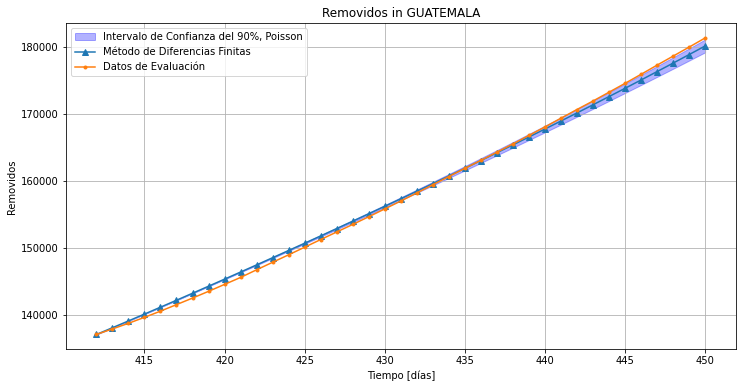

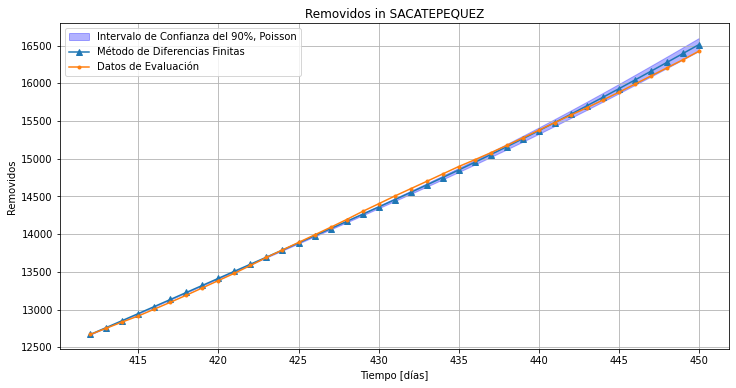

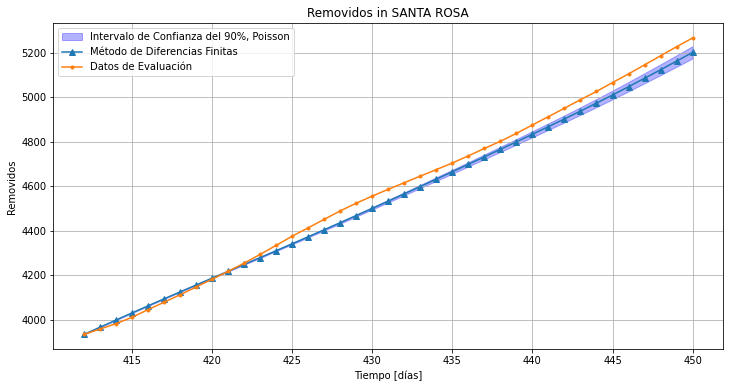

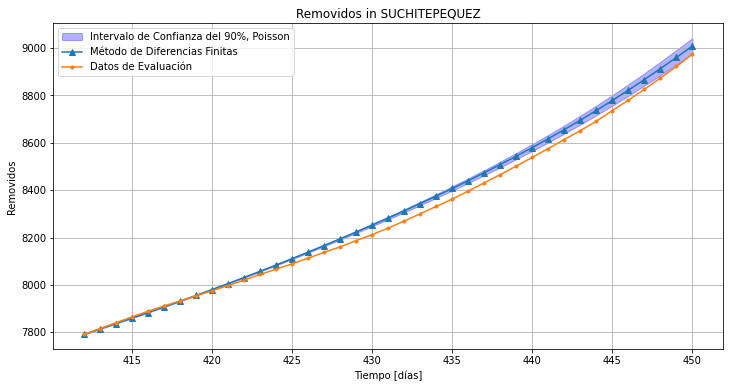

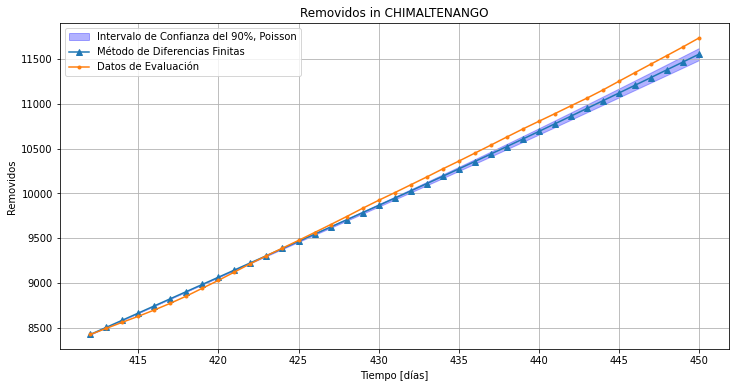

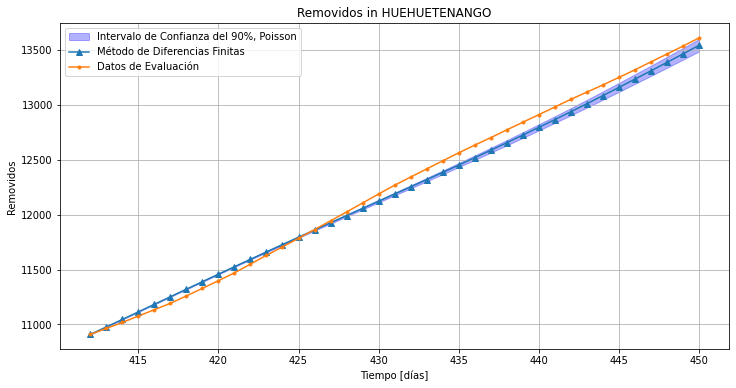

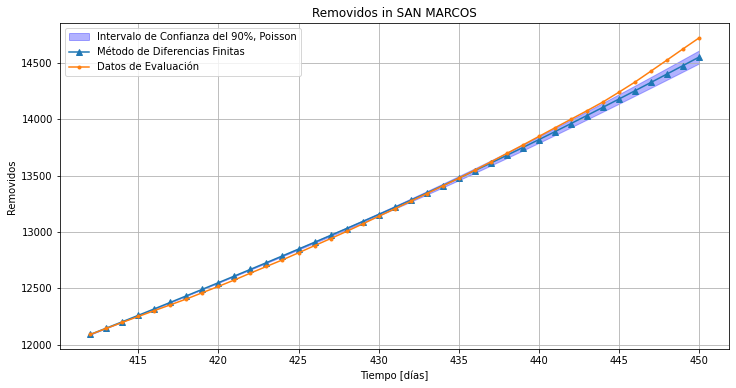

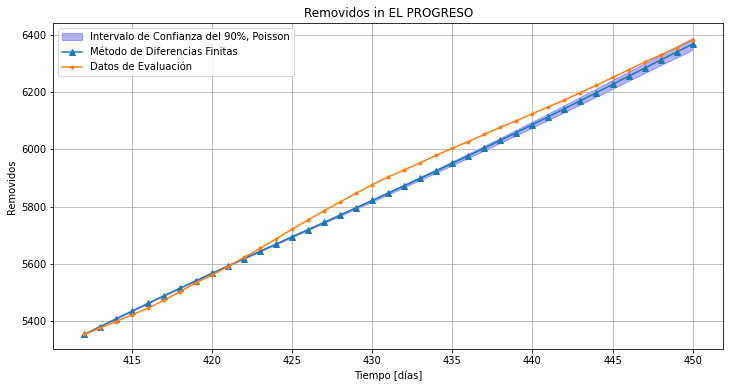

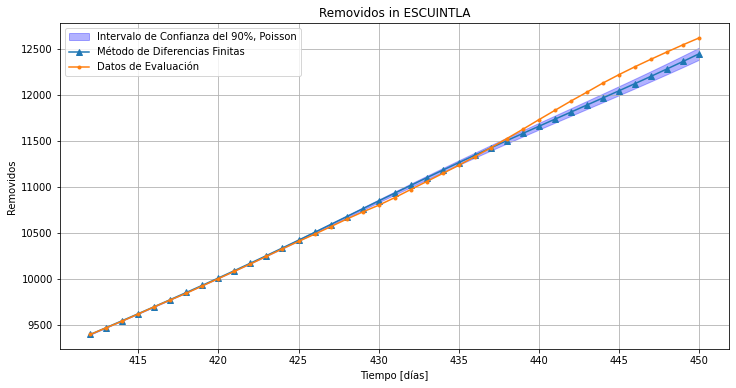

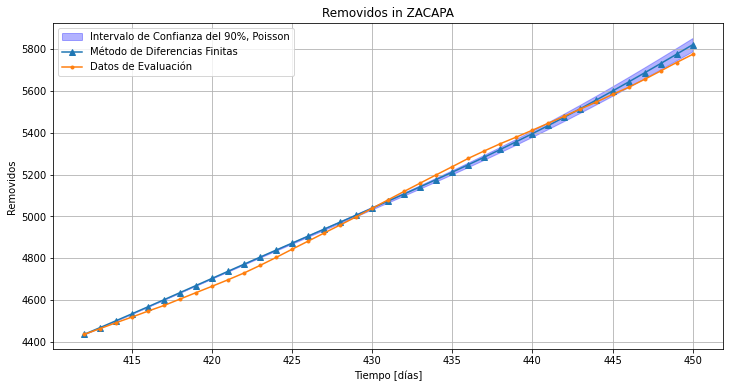

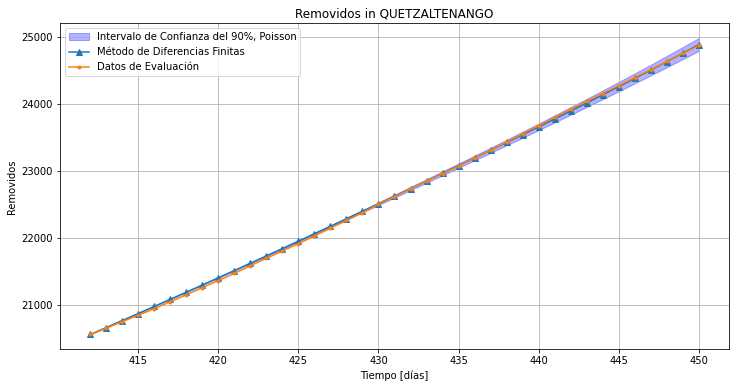

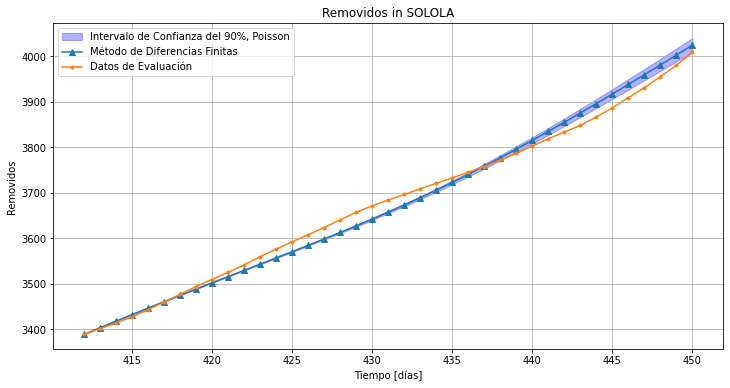

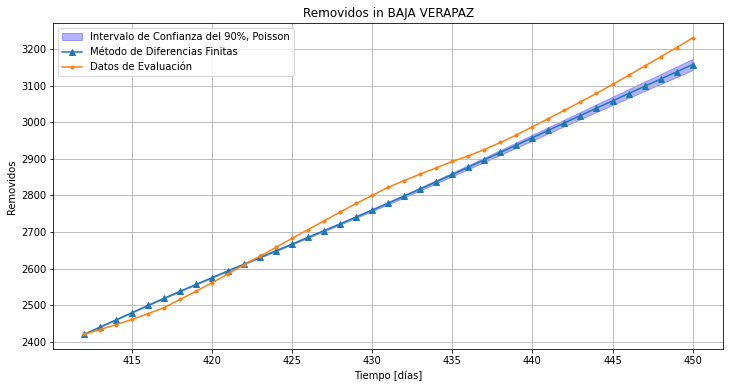

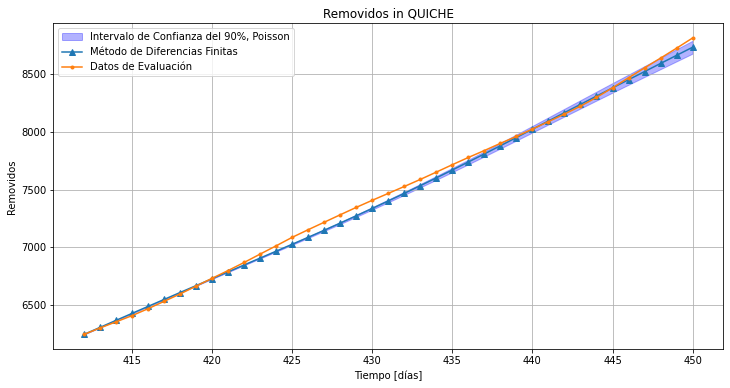

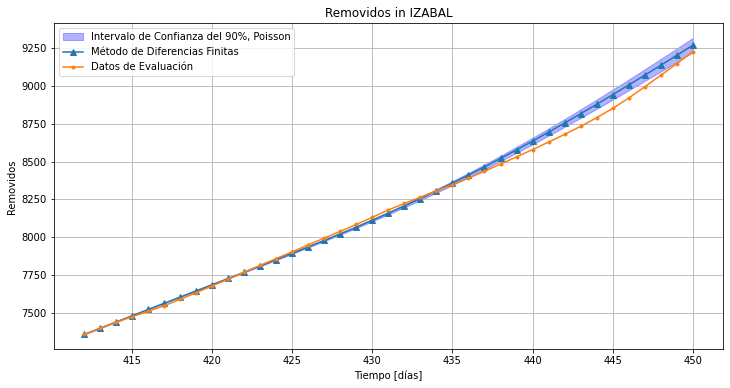

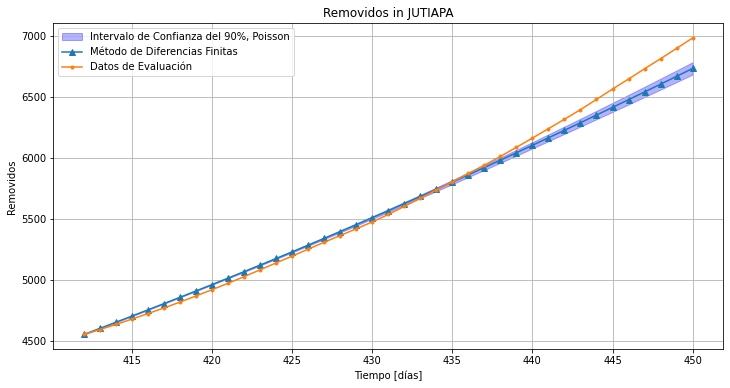

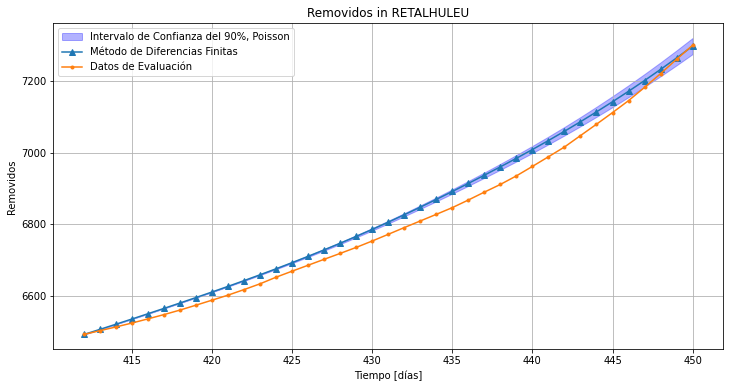

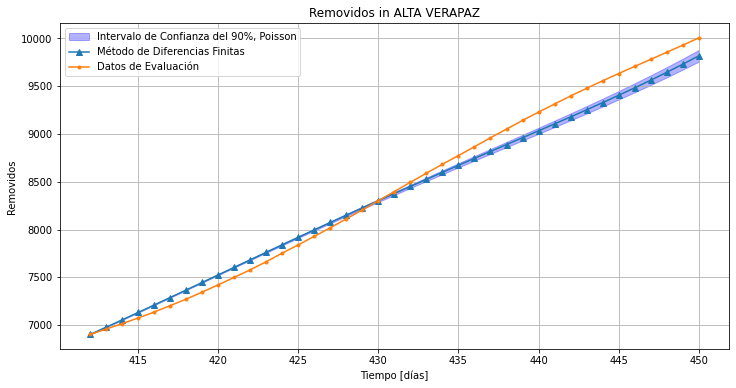

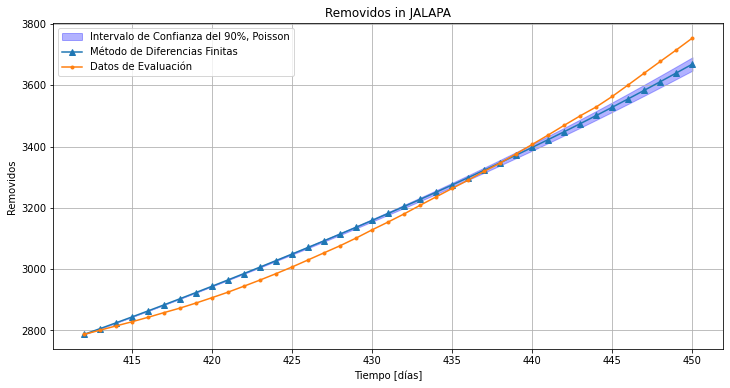

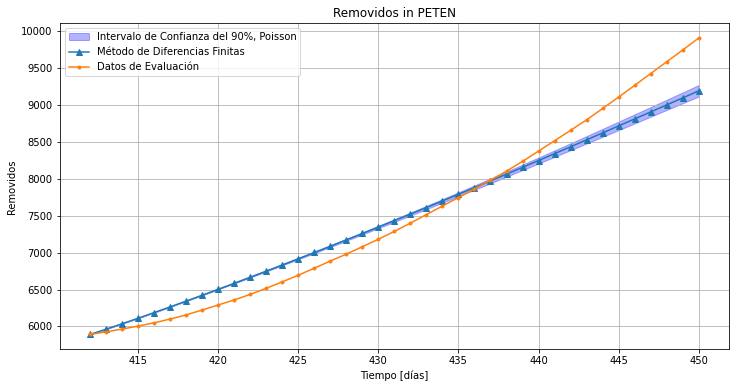

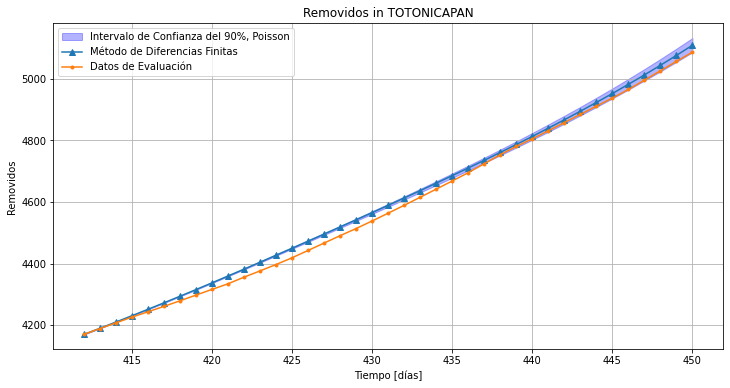

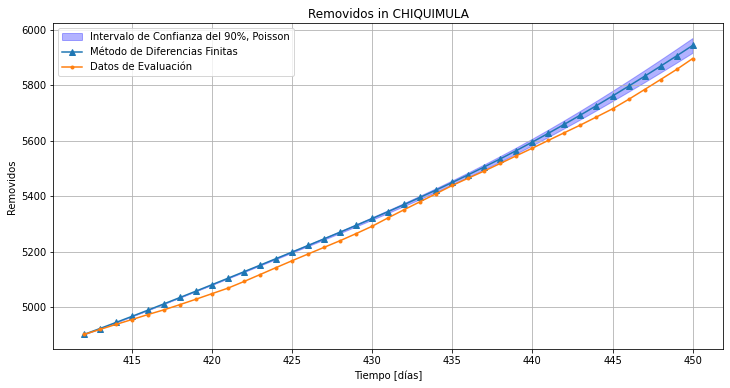

In [12]:
L = len(A[0])-1
for n in range(22):
#for n in range(len(departamentos)):
    df1 = pd.DataFrame({'Fecha':fechas[inicio:L],'Beta':Beta[n][inicio:L], 'I':I[n][inicio:L], 'S':S[n][inicio:L], 'R':R[n][inicio:L], 'A':A[n][inicio:L], 'dA':dA[n][inicio:L]})
    df1 = df1.set_index('Fecha')
    
    train_size = int(len(Rt[n][inicio:])-70)
    ######################################################################################
    ######################################################################################
    ######################################################################################   
    #Data frame de entrenamiento y prueba
    trainI, testI = df1.values[0:train_size,1:2],df1.values[train_size:len(df1.values),1:2]
    trainXI, trainYI = convert2matrix(trainI, look_back)
    testXI, testYI = convert2matrix(testI, look_back)
  
    #prediction_plot(testYI,test_predictI)
    ######################################################################################
    ######################################################################################
    ######################################################################################    
    
    trainS, testS = df1.values[0:train_size,2:3],df1.values[train_size:len(df1.values),2:3]############3333

    trainXS, trainYS= convert2matrix(trainS, look_back)
    testXS, testYS = convert2matrix(testS, look_back)
    
   
    #prediction_plot(testYS,test_predictS)
    ######################################################################################
    ######################################################################################
    ######################################################################################    

    trainR, testR = df1.values[0:train_size,3:4],df1.values[train_size:len(df1.values),3:4]############

    trainXR, trainYR= convert2matrix(trainR, look_back)
    testXR, testYR = convert2matrix(testR, look_back)

    ######################################################
    trainA, testA = df1.values[0:train_size,4:5],df1.values[train_size:len(df1.values),4:5]############

    trainXA, trainYA= convert2matrix(trainA, look_back)
    testXA, testYA = convert2matrix(testA, look_back)
    
    
    ######################################################
    traindA, testdA = df1.values[0:train_size,5:6],df1.values[train_size:len(df1.values),5:6]############

    trainXdA, trainYdA= convert2matrix(traindA, look_back)
    testXdA, testYdA = convert2matrix(testdA, look_back)
    
    #prediction_plot(testYR,test_predictR)
    ######################################################################################
    ######################################################################################
    ######################################################################################    
    I0 = testYI[0]
    S0 = testYS[0]
    R0 = testYR[0]
    A0 = testYA[0]
    dA0 = testYdA[0]
    Bpred = pd.read_csv(NOMBREDEPTO[n] + 'BetaCon90%Poisson.csv')
    Bpred = Bpred.to_numpy()/1000
    #en el siguiente bloque tenia originalmente los coef 0,1 y 2 en Bpred.transpose()[0], los modifico 24/01
    Infected,Sucept,Remov, ACUMULADO, RepDiario = DifFinitas2(I0,S0,R0, Bpred.transpose()[0],n, Poblacion, dA0, A0) #predicciones
    DeltaI1, DeltaS1, DeltaR1, DeltaA1, DeltaRep1 = DifFinitas2(I0,S0,R0, Bpred.transpose()[2],n, Poblacion, dA0, A0)
    DeltaI2, DeltaS2, DeltaR2, DeltaA2, DeltaRep2 = DifFinitas2(I0,S0,R0, Bpred.transpose()[3],n, Poblacion, dA0, A0)
    #############################
    #############################
    date1 = []
    for j in range(look_back, look_back + len(trainYI)):
        date1.append(j)
    date2 = []
    for j in range(len(trainYI) + look_back+ look_back, len(I[n][inicio:L])):
        date2.append(j)
    plt.figure(figsize=(12,6))
    ##########################################################
    ####plt.plot(date2, DeltaRep1,  '.-', color = 'g')
    ####plt.plot(date2, DeltaRep2,  '.-', label=' Uncertainty ', color = 'g')
    
    plt.fill_between(date2, DeltaR1, DeltaR2,color = 'b',
                    alpha = 0.3,  label= 'Intervalo de Confianza del 90%, Poisson' )
    #Cual es el intervalo de confianza asociado a esta incertidumbre
    ##########################################################
    #plt.plot(dA[n][inicio:],label='Reporte diario Real')
    plt.plot(date2, Remov,  '^-', label='Método de Diferencias Finitas')
    #plt.plot(date1, trainYdA, label='Reporte Diario Train')
    plt.plot(date2, testYR, '.-', label='Datos de Evaluación')    #Susceptibles?
    plt.legend()
    plt.xlabel("Tiempo [días]")
    plt.ylabel("Removidos")
    plt.grid()
    plt.title('Removidos in ' + NOMBREDEPTO[n])
    plt.savefig('SIR/'+NOMBREDEPTO[n]+'RemovedPoisson90' + '.pdf', bbox_inches = 'tight')


In [13]:
BpredOriginal = pd.read_csv(NOMBREDEPTO[n] + 'BetaCon90%Poisson.csv')


In [14]:
BpredOriginal

Beta  Desviacion 90%  Limite Inferior  Limite Superior
0   64.571915        1.321867        63.250048        65.893782
1   63.646202        1.312357        62.333845        64.958560
2   62.425277        1.299709        61.125568        63.724986
3   61.122687        1.286077        59.836610        62.408765
4   57.319135        1.245420        56.073715        58.564554
5   54.468128        1.214052        53.254076        55.682179
6   53.874784        1.207421        52.667363        55.082205
7   53.877184        1.207448        52.669736        55.084632
8   53.505525        1.203276        52.302250        54.708801
9   53.278479        1.200720        52.077759        54.479200
10  52.350878        1.190222        51.160656        53.541100
11  51.525142        1.180798        50.344344        52.705940
12  51.880151        1.184859        50.695292        53.065010
13  52.562635        1.192627        51.370008        53.755261
14  56.090179        1.231996        54.858183        57.322175
15  59.442677        1.268280        58.174398        60.710957
16  61.538145        1.290441        60.247704        62.828586
17  62.870548        1.304336        61.566212        64.174884
18  65.014182        1.326386        63.687796        66.340569
19  67.984092        1.356343        66.627749        69.340435
20  69.129473        1.367721        67.761752        70.497194
21  70.214893        1.378417        68.836476        71.593310
22  72.275191        1.398494        70.876697        73.673685
23  73.267248        1.408059        71.859189        74.675307
24  73.056202        1.406030        71.650172        74.462231
25  75.904036        1.433172        74.470864        77.337208
26  77.082017        1.444250        75.637767        78.526267
27  77.433115        1.447536        75.985579        78.880650
28  75.430617        1.428696        74.001921        76.859313
29  73.011513        1.405599        71.605913        74.417112
30  70.869553        1.384828        69.484725        72.254381
31  68.350951        1.359998        66.990954        69.710949
32  67.110373        1.347599        65.762774        68.457972
33  64.557319        1.321718        63.235601        65.879036
34  65.153579        1.327807        63.825771        66.481386
35  64.802633        1.324226        63.478407        66.126859
36  64.286018        1.318937        62.967081        65.604956
37  63.852691        1.314485        62.538206        65.167176
38  62.928392        1.304936        61.623456        64.233328

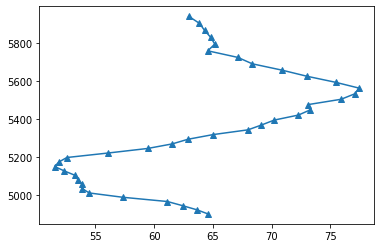

In [15]:
plt.plot(BpredOriginal["Beta"], Remov[0:39],  '^-', label='Finite Differences Method')


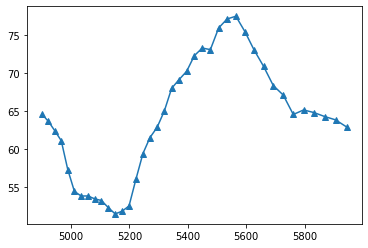

In [16]:
plt.plot(Remov[0:39], BpredOriginal["Beta"],  '^-', label='Finite Differences Method')


In [17]:
NOMBREDEPTO[n]

'CHIQUIMULA'

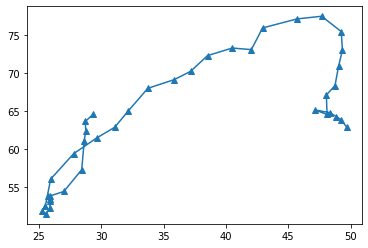

In [18]:
plt.plot(RepDiario[0:39], BpredOriginal["Beta"],  '^-', label='Finite Differences Method')

In [19]:
BpredOriginal["Beta"]

0     64.571915
1     63.646202
2     62.425277
3     61.122687
4     57.319135
5     54.468128
6     53.874784
7     53.877184
8     53.505525
9     53.278479
10    52.350878
11    51.525142
12    51.880151
13    52.562635
14    56.090179
15    59.442677
16    61.538145
17    62.870548
18    65.014182
19    67.984092
20    69.129473
21    70.214893
22    72.275191
23    73.267248
24    73.056202
25    75.904036
26    77.082017
27    77.433115
28    75.430617
29    73.011513
30    70.869553
31    68.350951
32    67.110373
33    64.557319
34    65.153579
35    64.802633
36    64.286018
37    63.852691
38    62.928392
Name: Beta, dtype: float64

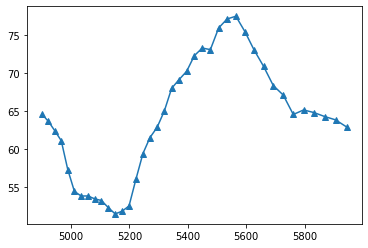

In [20]:
plt.plot(Remov[0:39], BpredOriginal["Beta"],  '^-', label='Finite Differences Method')

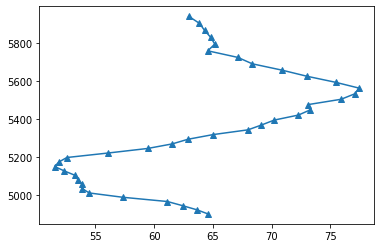

In [21]:
plt.plot(BpredOriginal["Beta"], Remov[0:39],   '^-', label='Finite Differences Method')

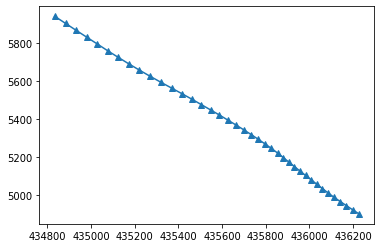

In [22]:
plt.plot(Sucept, Remov,   '^-', label='Finite Differences Method')

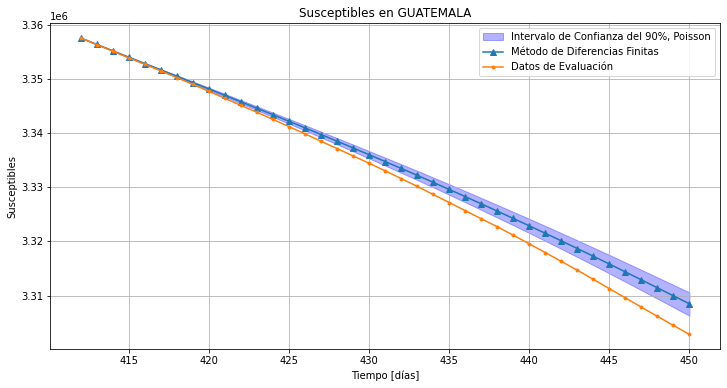

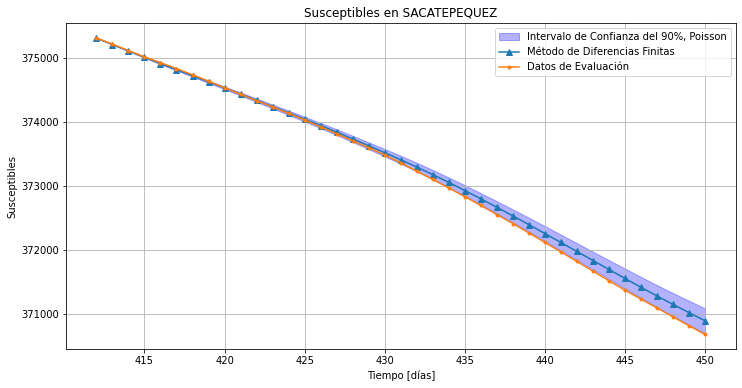

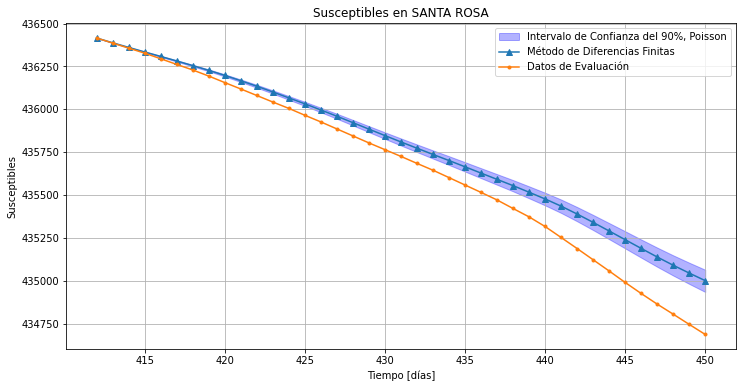

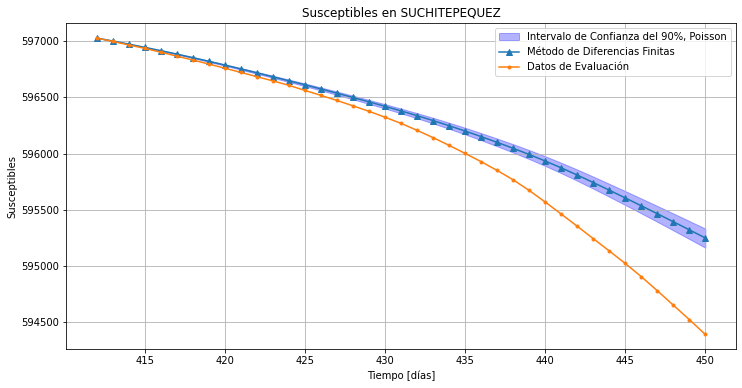

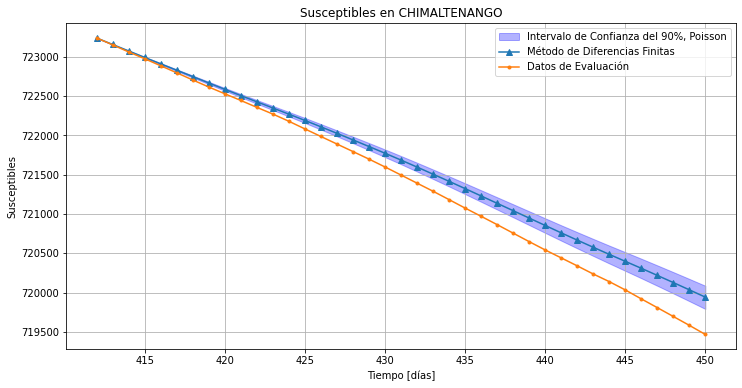

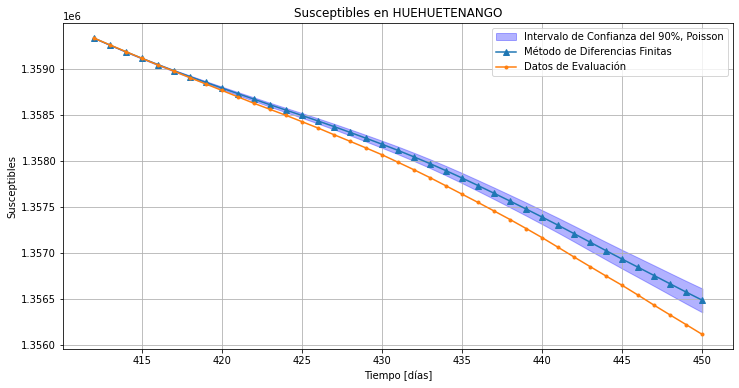

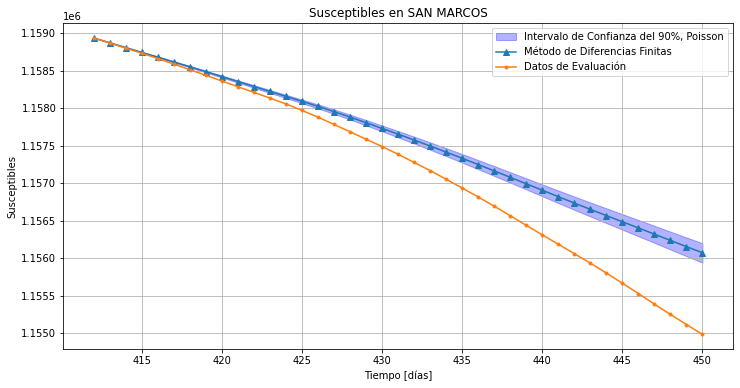

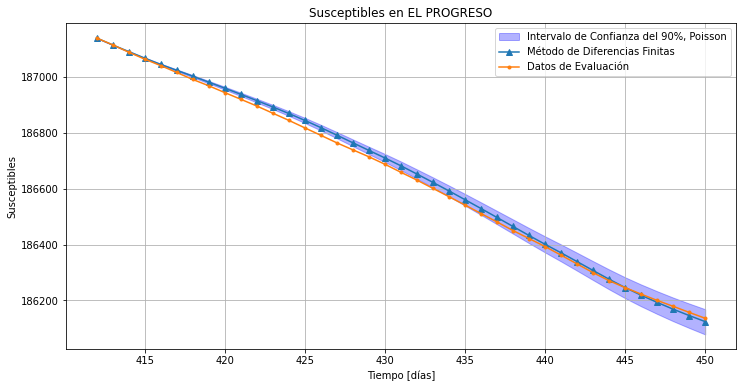

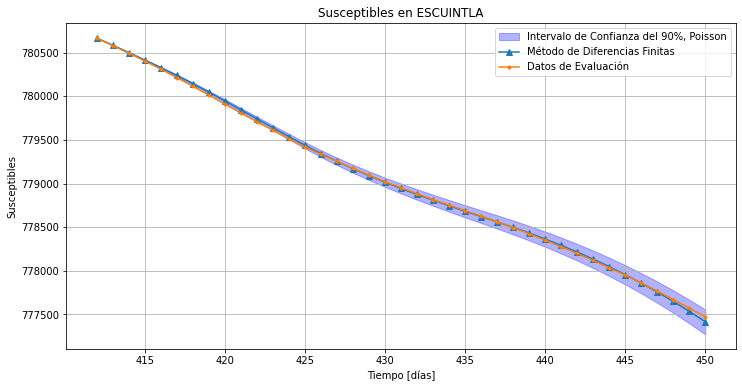

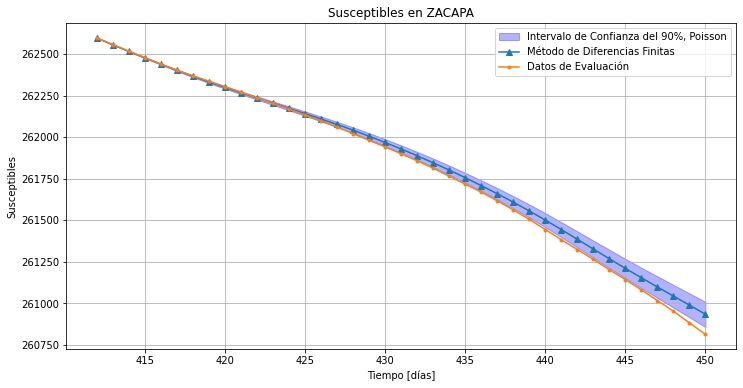

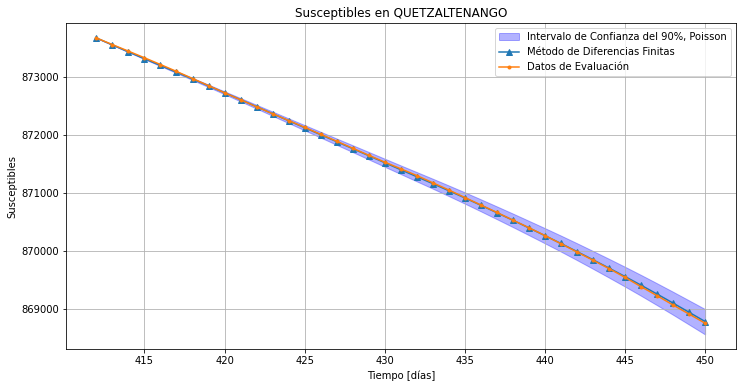

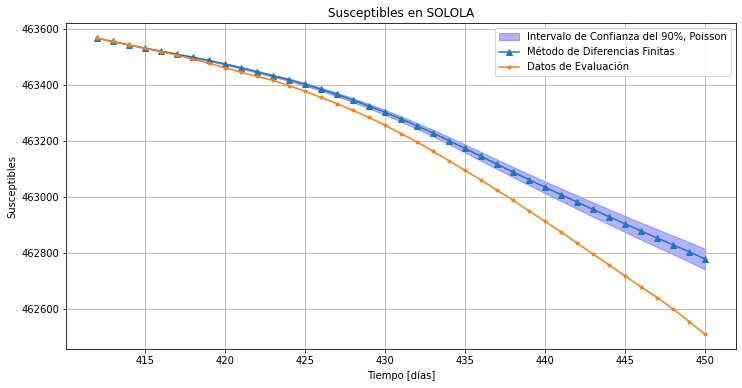

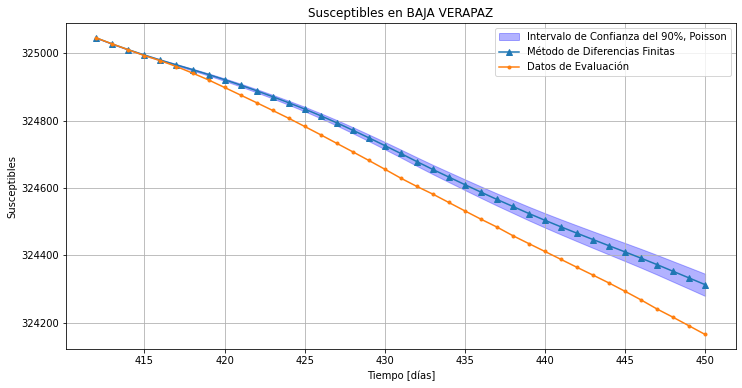

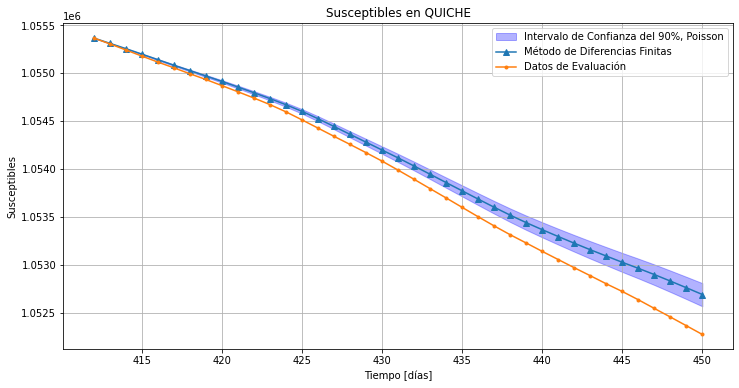

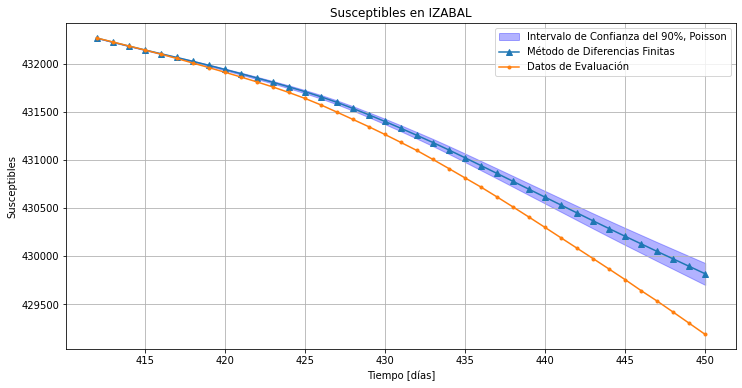

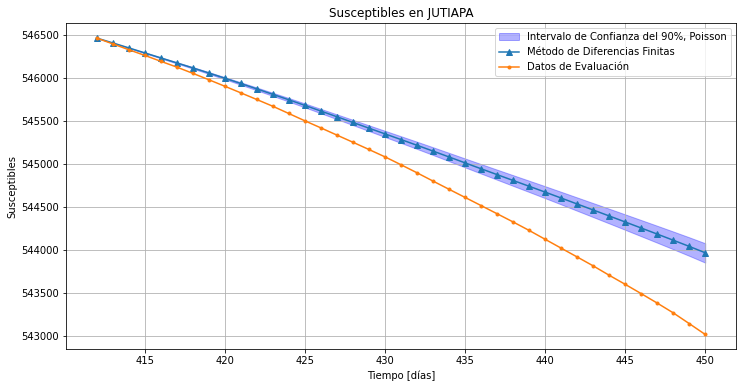

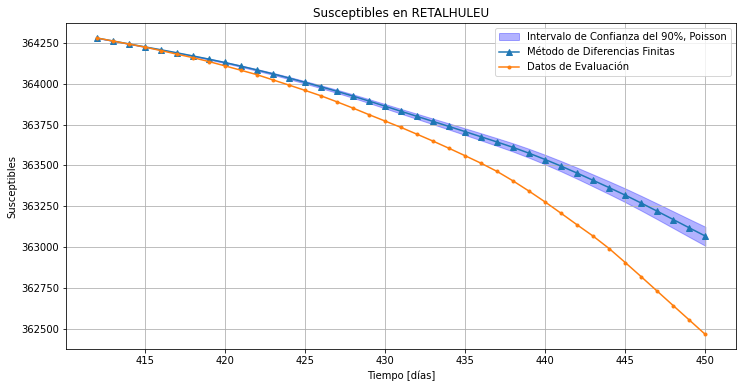

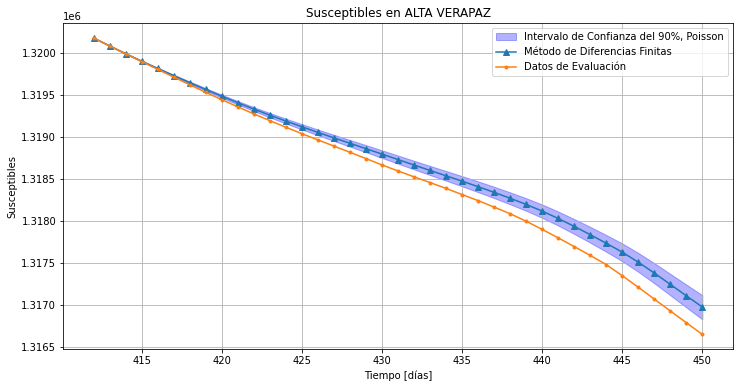

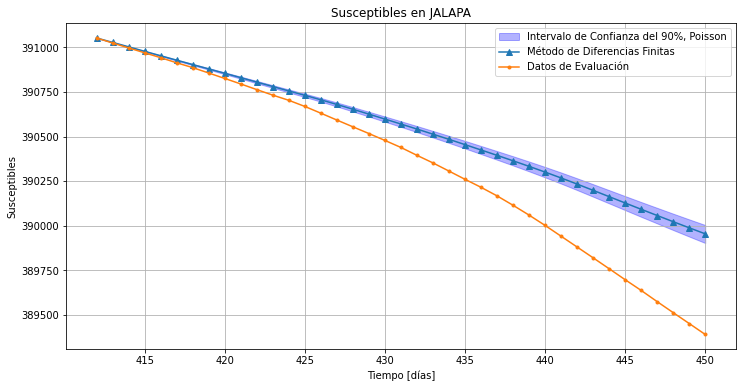

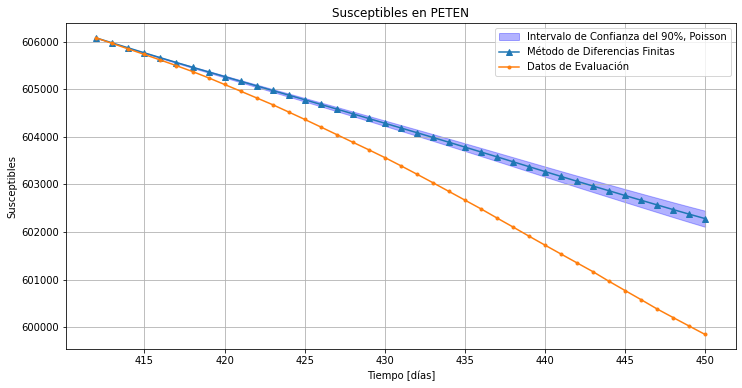

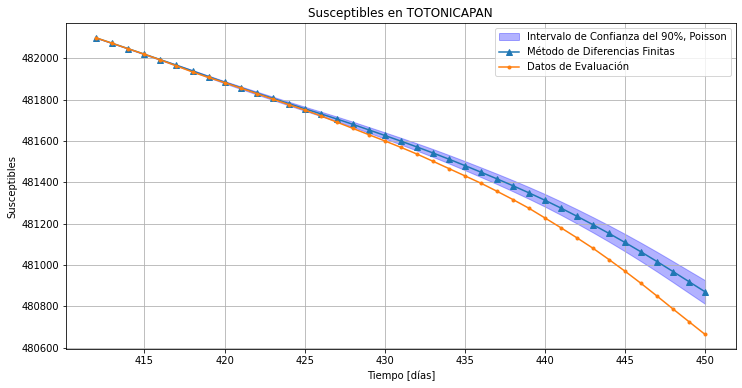

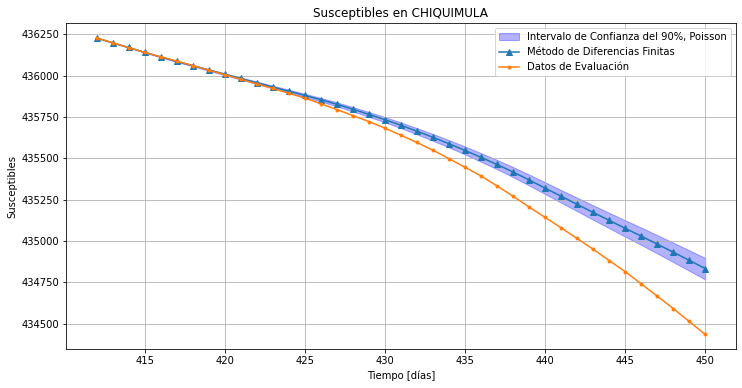

In [23]:
L = len(A[0])-1
for n in range(22):
#for n in range(len(departamentos)):
    df1 = pd.DataFrame({'Fecha':fechas[inicio:L],'Beta':Beta[n][inicio:L], 'I':I[n][inicio:L], 'S':S[n][inicio:L], 'R':R[n][inicio:L], 'A':A[n][inicio:L], 'dA':dA[n][inicio:L]})
    df1 = df1.set_index('Fecha')
    
    train_size = int(len(Rt[n][inicio:])-70)
    ######################################################################################
    ######################################################################################
    ######################################################################################   
    #Data frame de entrenamiento y prueba
    trainI, testI = df1.values[0:train_size,1:2],df1.values[train_size:len(df1.values),1:2]
    trainXI, trainYI = convert2matrix(trainI, look_back)
    testXI, testYI = convert2matrix(testI, look_back)
  
    #prediction_plot(testYI,test_predictI)
    ######################################################################################
    ######################################################################################
    ######################################################################################    
    
    trainS, testS = df1.values[0:train_size,2:3],df1.values[train_size:len(df1.values),2:3]############3333

    trainXS, trainYS= convert2matrix(trainS, look_back)
    testXS, testYS = convert2matrix(testS, look_back)
    
   
    #prediction_plot(testYS,test_predictS)
    ######################################################################################
    ######################################################################################
    ######################################################################################    

    trainR, testR = df1.values[0:train_size,3:4],df1.values[train_size:len(df1.values),3:4]############

    trainXR, trainYR= convert2matrix(trainR, look_back)
    testXR, testYR = convert2matrix(testR, look_back)

    ######################################################
    trainA, testA = df1.values[0:train_size,4:5],df1.values[train_size:len(df1.values),4:5]############

    trainXA, trainYA= convert2matrix(trainA, look_back)
    testXA, testYA = convert2matrix(testA, look_back)
    
    
    ######################################################
    traindA, testdA = df1.values[0:train_size,5:6],df1.values[train_size:len(df1.values),5:6]############

    trainXdA, trainYdA= convert2matrix(traindA, look_back)
    testXdA, testYdA = convert2matrix(testdA, look_back)
    
    #prediction_plot(testYR,test_predictR)
    ######################################################################################
    ######################################################################################
    ######################################################################################    
    I0 = testYI[0]
    S0 = testYS[0]
    R0 = testYR[0]
    A0 = testYA[0]
    dA0 = testYdA[0]
    Bpred = pd.read_csv(NOMBREDEPTO[n] + 'BetaCon90%Poisson.csv')
    Bpred = Bpred.to_numpy()/1000
    Infected,Sucept,Remov, ACUMULADO, RepDiario = DifFinitas2(I0,S0,R0, Bpred.transpose()[0],n, Poblacion, dA0, A0) #predicciones
    DeltaI1, DeltaS1, DeltaR1, DeltaA1, DeltaRep1 = DifFinitas2(I0,S0,R0, Bpred.transpose()[2],n, Poblacion, dA0, A0)
    DeltaI2, DeltaS2, DeltaR2, DeltaA2, DeltaRep2 = DifFinitas2(I0,S0,R0, Bpred.transpose()[3],n, Poblacion, dA0, A0)
    #############################
    #############################
    date1 = []
    for j in range(look_back, look_back + len(trainYI)):
        date1.append(j)
    date2 = []
    for j in range(len(trainYI) + look_back+ look_back, len(I[n][inicio:L])):
        date2.append(j)
    plt.figure(figsize=(12,6))
    ##########################################################
    ##plt.plot(date2, DeltaS1,  '.-', color = 'g')
    ##plt.plot(date2, DeltaS2,  '.-', label='Uncertainty', color = 'g')
    plt.fill_between(date2, DeltaS1, DeltaS2,color = 'b', alpha = 0.3, 
                     label= 'Intervalo de Confianza del 90%, Poisson' )

    ######################################################
    plt.plot(date2, Sucept,  '^-', label='Método de Diferencias Finitas')
    plt.plot(date2, testYS, '.-', label='Datos de Evaluación')    #Susceptibles?
    plt.legend()
    plt.grid()
    plt.xlabel("Tiempo [días]")
    plt.ylabel("Susceptibles")
    plt.title("Susceptibles en " + NOMBREDEPTO[n])
    plt.savefig('SIR/'+NOMBREDEPTO[n]+'SusceptiblesPoisson90' + '.pdf', bbox_inches = 'tight')
    ######################################################################################
    ######################################################################################
    ###################################################################################### 
